# Cervical Cancer Risk Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

###  Reading and Understanding the data

In [2]:
df=pd.read_csv("cervical-cancer_csv.csv")

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

* We can see that the columns names contains spaces and colons. So renaming the columns for convenience

In [5]:
df.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']

### Checking the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   No_of_sex_partner                   810 non-null    float64
 2   First_sexual_intercourse            828 non-null    float64
 3   No_pregnancies                      779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes_yrs                          822 non-null    float64
 6   Smokes_packs_yr                     822 non-null    float64
 7   Hormonal_Contraceptives             732 non-null    float64
 8   Hormonal_Contraceptives_years       732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD_years                           723 non-null    float64
 11  STDs                                735 non-n

* Predominant of the features are of categorical and remaining are of numerical.

### Checking the dimensions

In [7]:
df.shape

(835, 36)

* We have a total of 858 records and 36 different features.

### Checking for missing values

* So, first we are replacing '?' with Numpy NaN values.

In [8]:
## replace ? with NaN
df = df.replace('?', np.NaN)

### Checking the % of missing values in each feature

<AxesSubplot:>

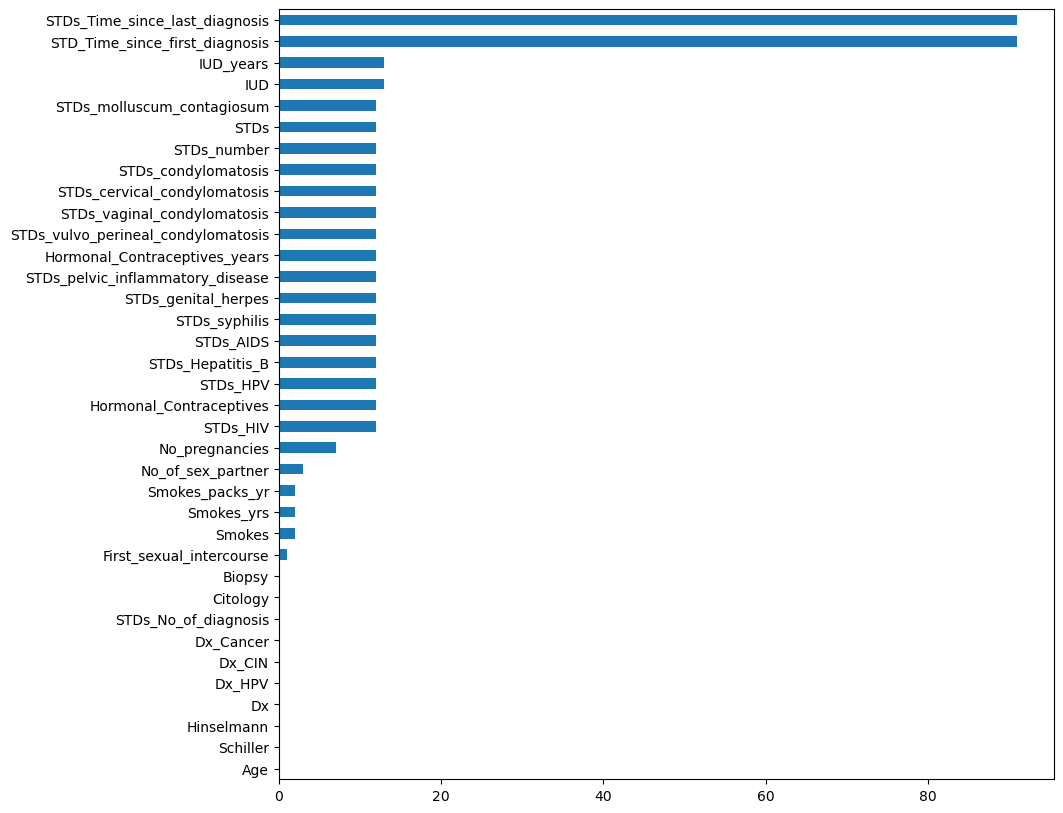

In [9]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

* We can see that the features 'STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis' are having more than 80 % null values. 
* So we are dropping it off and also the features 'Smokes' and 'First_sexual_intercourse' are having very little amount of null values and hence we would be removing those particular missing records of those 2 columns.

In [10]:
df=df.drop(['STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis'],axis=1)
df=df.drop(df.index[df.Smokes.isnull()] | df.index[df.First_sexual_intercourse.isnull()])

### Partioning the features manually into categorical and numerical

* We are doing it manually it because there are a few columns like 'No_of_sex_partner' , 'First_Sexual_intercourse' , 'No_pregnancies' are actually of object categorical type but which should be of numerical type in general

In [11]:
x_features=list(df.columns)
x_features.remove('Biopsy')

In [12]:
x_features_categorical=[
 'Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis','STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis','STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS','STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx']
x_features_categorical

['Smokes',
 'Hormonal_Contraceptives',
 'IUD',
 'STDs',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [13]:
x_features_numerical=[i for i in x_features if i not in x_features_categorical]
x_features_numerical

['Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']

### Missing Value Imputation of IUD

In [14]:
df_iud=df.copy()

x_features_categorical.remove('IUD')
for i in x_features_categorical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].mode()[0])
for i in x_features_numerical:
    df_iud[i]=df_iud[i].fillna(df_iud[i].median())
    
df_iud=df_iud.astype('float')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(0,'no')
df_iud[x_features_categorical]=df_iud[x_features_categorical].replace(1,'yes')
df_iud=pd.get_dummies(df_iud)

train_iud=df_iud[df_iud.IUD.isnull()==False]
test_iud=df_iud[df_iud.IUD.isnull()]

train_iud_x=train_iud.drop('IUD',axis=1)
train_iud_y=train_iud['IUD']

test_iud_x=test_iud.drop('IUD',axis=1)
test_iud_y=test_iud['IUD']

dt=DecisionTreeClassifier()
iud_model=dt.fit(train_iud_x,train_iud_y)
test_iud['IUD']=iud_model.predict(test_iud_x)

iud_complete=pd.concat([train_iud,test_iud],axis=0)

df_impute=df.copy()
df_impute['IUD']=iud_complete['IUD'].sort_index()

* df_impute is the new dataframe that contains missing values imputed columns

### Missing Value Imputation for IUD_years

#### Here we can impute the missing values of IUD years considering the following reasons
- For all the zero values of IUD_years, the value of IUD is zero.
- For the zero values of IUD , the value of IUD_years is zero.
- The predicted value of IUD is completely zero and hence we can consider that the predicted value of IUD years will also be zero.

In [15]:
x_features_numerical.remove('IUD_years')
df_impute['IUD_years']=df_impute['IUD_years'].fillna(0)

### Missing Value Imputation for Hormonal_Contraceptives

In [16]:
df_hor=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('Hormonal_Contraceptives')
for i in x_features_categorical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].mode()[0])
for i in x_features_numerical:
    df_hor[i]=df_hor[i].fillna(df_hor[i].median())
    
df_hor=df_hor.astype('float')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(0,'no')
df_hor[x_features_categorical]=df_hor[x_features_categorical].replace(1,'yes')
df_hor=pd.get_dummies(df_hor)

train_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()==False]
test_hor=df_hor[df_hor.Hormonal_Contraceptives.isnull()]

train_hor_x=train_hor.drop('Hormonal_Contraceptives',axis=1)
train_hor_y=train_hor['Hormonal_Contraceptives']

test_hor_x=test_hor.drop('Hormonal_Contraceptives',axis=1)
test_hor_y=test_hor['Hormonal_Contraceptives']

dt=DecisionTreeClassifier()
hor_model=dt.fit(train_hor_x,train_hor_y)
test_hor['Hormonal_Contraceptives']=hor_model.predict(test_hor_x)

hor_complete=pd.concat([train_hor,test_hor],axis=0)

df_impute['Hormonal_Contraceptives']=hor_complete['Hormonal_Contraceptives'].sort_index()

### Missing Value Imputation for Hormonal_Contraceptives_Years

In [17]:
df_hor_y=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('Hormonal_Contraceptives_years')
for i in x_features_categorical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].mode()[0])

for i in x_features_numerical:
    df_hor_y[i]=df_hor_y[i].fillna(df_hor_y[i].median())

df_hor_y=df_hor_y.astype('float')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(0,'no')
df_hor_y[x_features_categorical]=df_hor_y[x_features_categorical].replace(1,'yes')
df_hor_y=pd.get_dummies(df_hor_y)

train_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()==False]
test_hor_yrs=df_hor_y[df_hor_y.Hormonal_Contraceptives_years.isnull()]

train_hor_yrs_x=train_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
train_hor_yrs_y=train_hor_yrs['Hormonal_Contraceptives_years']

test_hor_yrs_x=test_hor_yrs.drop('Hormonal_Contraceptives_years',axis=1)
test_hor_yrs_y=test_hor_yrs['Hormonal_Contraceptives_years']

dt=DecisionTreeRegressor()
hor_yrs_model=dt.fit(train_hor_yrs_x,train_hor_yrs_y)
test_hor_yrs['Hormonal_Contraceptives_years']=hor_yrs_model.predict(test_hor_yrs_x)

hor_yrs_complete=pd.concat([train_hor_yrs,test_hor_yrs],axis=0)

df_impute['Hormonal_Contraceptives_years']=hor_yrs_complete['Hormonal_Contraceptives_years'].sort_index()

### Missing Value Imputation for STDs

In [18]:
df_std=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs')
for i in x_features_categorical:
    df_std[i]=df_std[i].fillna(df_std[i].mode()[0])
for i in x_features_numerical:
    df_std[i]=df_std[i].fillna(df_std[i].median())
    
df_std=df_std.astype('float')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(0,'no')
df_std[x_features_categorical]=df_std[x_features_categorical].replace(1,'yes')
df_std=pd.get_dummies(df_std)

train_std=df_std[df_std.STDs.isnull()==False]
test_std=df_std[df_std.STDs.isnull()]

train_std_x=train_std.drop('STDs',axis=1)
train_std_y=train_std['STDs']

test_std_x=test_std.drop('STDs',axis=1)
test_std_y=test_std['STDs']

dt=DecisionTreeClassifier()
std_model=dt.fit(train_std_x,train_std_y)
test_std['STDs']=std_model.predict(test_std_x)

std_complete=pd.concat([train_std,test_std],axis=0)

df_impute['STDs']=std_complete['STDs'].sort_index()

### Missing Value Imputation for STDs_Number

In [19]:
df_std_num=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('STDs_number')
for i in x_features_categorical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].mode()[0])
for i in x_features_numerical:
    df_std_num[i]=df_std_num[i].fillna(df_std_num[i].median())

df_std_num=df_std_num.astype('float')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(0,'no')
df_std_num[x_features_categorical]=df_std_num[x_features_categorical].replace(1,'yes')
df_std_num=pd.get_dummies(df_std_num)

train_std_num=df_std_num[df_std_num.STDs_number.isnull()==False]
test_std_num=df_std_num[df_std_num.STDs_number.isnull()]

train_std_num_x=train_std_num.drop('STDs_number',axis=1)
train_std_num_y=train_std_num['STDs_number']

test_std_num_x=test_std_num.drop('STDs_number',axis=1)
test_std_num_y=test_std_num['STDs_number']

dt=DecisionTreeRegressor()
std_model_num=dt.fit(train_std_num_x,train_std_num_y)
test_std_num['STDs_number']=std_model_num.predict(test_std_num_x)

std_num_complete=pd.concat([train_std_num,test_std_num],axis=0)

df_impute['STDs_number']=std_num_complete['STDs_number'].sort_index()

### Missing Value Imputation for STDs_condylomatosis

In [20]:
df_std_con=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_condylomatosis')
for i in x_features_categorical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].mode()[0])
for i in x_features_numerical:
    df_std_con[i]=df_std_con[i].fillna(df_std_con[i].median())

df_std_con=df_std_con.astype('float')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(0,'no')
df_std_con[x_features_categorical]=df_std_con[x_features_categorical].replace(1,'yes')
df_std_con=pd.get_dummies(df_std_con)

train_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()==False]
test_std_con=df_std_con[df_std_con.STDs_condylomatosis.isnull()]

train_std_con_x=train_std_con.drop('STDs_condylomatosis',axis=1)
train_std_con_y=train_std_con['STDs_condylomatosis']

test_std_con_x=test_std_con.drop('STDs_condylomatosis',axis=1)
test_std_con_y=test_std_con['STDs_condylomatosis']

dt=DecisionTreeClassifier()
std_model_con=dt.fit(train_std_con_x,train_std_con_y)
test_std_con['STDs_condylomatosis']=std_model_con.predict(test_std_con_x)

std_con_complete=pd.concat([train_std_con,test_std_con],axis=0)

df_impute['STDs_condylomatosis']=std_con_complete['STDs_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_cervical_condylomatosis

In [21]:
df_std_cerv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_cervical_condylomatosis')
for i in x_features_categorical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].mode()[0])
for i in x_features_numerical:
    df_std_cerv[i]=df_std_cerv[i].fillna(df_std_cerv[i].median())

df_std_cerv=df_std_cerv.astype('float')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(0,'no')
df_std_cerv[x_features_categorical]=df_std_cerv[x_features_categorical].replace(1,'yes')
df_std_cerv=pd.get_dummies(df_std_cerv)

train_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()==False]
test_std_cerv=df_std_cerv[df_std_cerv.STDs_cervical_condylomatosis.isnull()]

train_std_cerv_x=train_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
train_std_cerv_y=train_std_cerv['STDs_cervical_condylomatosis']

test_std_cerv_x=test_std_cerv.drop('STDs_cervical_condylomatosis',axis=1)
test_std_cerv_y=test_std_cerv['STDs_cervical_condylomatosis']

dt=DecisionTreeClassifier()
std_model_cerv=dt.fit(train_std_cerv_x,train_std_cerv_y)
test_std_cerv['STDs_cervical_condylomatosis']=std_model_cerv.predict(test_std_cerv_x)

std_cerv_complete=pd.concat([train_std_cerv,test_std_cerv],axis=0)

df_impute['STDs_cervical_condylomatosis']=std_cerv_complete['STDs_cervical_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_vaginal_condylomatosis

In [22]:
df_std_vagi=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vaginal_condylomatosis')
for i in x_features_categorical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].mode()[0])
for i in x_features_numerical:
    df_std_vagi[i]=df_std_vagi[i].fillna(df_std_vagi[i].median())

df_std_vagi=df_std_vagi.astype('float')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(0,'no')
df_std_vagi[x_features_categorical]=df_std_vagi[x_features_categorical].replace(1,'yes')
df_std_vagi=pd.get_dummies(df_std_vagi)

train_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()==False]
test_std_vagi=df_std_vagi[df_std_vagi.STDs_vaginal_condylomatosis.isnull()]

train_std_vagi_x=train_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
train_std_vagi_y=train_std_vagi['STDs_vaginal_condylomatosis']

test_std_vagi_x=test_std_vagi.drop('STDs_vaginal_condylomatosis',axis=1)
test_std_vagi_y=test_std_vagi['STDs_vaginal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_vagi=dt.fit(train_std_vagi_x,train_std_vagi_y)
test_std_vagi['STDs_vaginal_condylomatosis']=std_model_vagi.predict(test_std_vagi_x)

std_vagi_complete=pd.concat([train_std_vagi,test_std_vagi],axis=0)

df_impute['STDs_vaginal_condylomatosis']=std_vagi_complete['STDs_vaginal_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_vulvo_perineal_condylomatosis 

In [23]:
df_std_peri=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_vulvo_perineal_condylomatosis')
for i in x_features_categorical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].mode()[0])
for i in x_features_numerical:
    df_std_peri[i]=df_std_peri[i].fillna(df_std_peri[i].median())

df_std_peri=df_std_peri.astype('float')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(0,'no')
df_std_peri[x_features_categorical]=df_std_peri[x_features_categorical].replace(1,'yes')
df_std_peri=pd.get_dummies(df_std_peri)

train_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()==False]
test_std_peri=df_std_peri[df_std_peri.STDs_vulvo_perineal_condylomatosis.isnull()]

train_std_peri_x=train_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
train_std_peri_y=train_std_peri['STDs_vulvo_perineal_condylomatosis']

test_std_peri_x=test_std_peri.drop('STDs_vulvo_perineal_condylomatosis',axis=1)
test_std_peri_y=test_std_peri['STDs_vulvo_perineal_condylomatosis']

dt=DecisionTreeClassifier()
std_model_peri=dt.fit(train_std_peri_x,train_std_peri_y)
test_std_peri['STDs_vulvo_perineal_condylomatosis']=std_model_peri.predict(test_std_peri_x)

std_peri_complete=pd.concat([train_std_peri,test_std_peri],axis=0)

df_impute['STDs_vulvo_perineal_condylomatosis']=std_peri_complete['STDs_vulvo_perineal_condylomatosis'].sort_index()

### Missing Value Imputation for STDs_syphilis 

In [24]:
df_std_syp=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_syphilis')
for i in x_features_categorical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].mode()[0])
for i in x_features_numerical:
    df_std_syp[i]=df_std_syp[i].fillna(df_std_syp[i].median())

df_std_syp=df_std_syp.astype('float')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(0,'no')
df_std_syp[x_features_categorical]=df_std_syp[x_features_categorical].replace(1,'yes')
df_std_syp=pd.get_dummies(df_std_syp)

train_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()==False]
test_std_syp=df_std_syp[df_std_syp.STDs_syphilis.isnull()]

train_std_syp_x=train_std_syp.drop('STDs_syphilis',axis=1)
train_std_syp_y=train_std_syp['STDs_syphilis']

test_std_syp_x=test_std_syp.drop('STDs_syphilis',axis=1)
test_std_syp_y=test_std_syp['STDs_syphilis']

dt=DecisionTreeClassifier()
std_model_syp=dt.fit(train_std_syp_x,train_std_syp_y)
test_std_syp['STDs_syphilis']=std_model_syp.predict(test_std_syp_x)

std_syp_complete=pd.concat([train_std_syp,test_std_syp],axis=0)

df_impute['STDs_syphilis']=std_syp_complete['STDs_syphilis'].sort_index()

### Missing Value Imputation for STDs_pelvic_inflammatory_disease

In [25]:
df_std_pelv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_pelvic_inflammatory_disease')
for i in x_features_categorical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].mode()[0])

for i in x_features_numerical:
    df_std_pelv[i]=df_std_pelv[i].fillna(df_std_pelv[i].median())                          

df_std_pelv=df_std_pelv.astype('float')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(0,'no')
df_std_pelv[x_features_categorical]=df_std_pelv[x_features_categorical].replace(1,'yes')
df_std_pelv=pd.get_dummies(df_std_pelv)

train_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()==False]
test_std_pelv=df_std_pelv[df_std_pelv.STDs_pelvic_inflammatory_disease.isnull()]

train_std_pelv_x=train_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
train_std_pelv_y=train_std_pelv['STDs_pelvic_inflammatory_disease']

test_std_pelv_x=test_std_pelv.drop('STDs_pelvic_inflammatory_disease',axis=1)
test_std_pelv_y=test_std_pelv['STDs_pelvic_inflammatory_disease']

dt=DecisionTreeClassifier()
std_model_pelv=dt.fit(train_std_pelv_x,train_std_pelv_y)
test_std_pelv['STDs_pelvic_inflammatory_disease']=std_model_pelv.predict(test_std_pelv_x)

std_pelv_complete=pd.concat([train_std_pelv,test_std_pelv],axis=0)

df_impute['STDs_pelvic_inflammatory_disease']=std_pelv_complete['STDs_pelvic_inflammatory_disease'].sort_index()

### Missing Value Imputation for STDs_genital_herpes

In [26]:
df_std_geni=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_genital_herpes')
for i in x_features_categorical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].mode()[0])
for i in x_features_numerical:
    df_std_geni[i]=df_std_geni[i].fillna(df_std_geni[i].median())

df_std_geni=df_std_geni.astype('float')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(0,'no')
df_std_geni[x_features_categorical]=df_std_geni[x_features_categorical].replace(1,'yes')
df_std_geni=pd.get_dummies(df_std_geni)

train_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()==False]
test_std_geni=df_std_geni[df_std_geni.STDs_genital_herpes.isnull()]

train_std_geni_x=train_std_geni.drop('STDs_genital_herpes',axis=1)
train_std_geni_y=train_std_geni['STDs_genital_herpes']

test_std_geni_x=test_std_geni.drop('STDs_genital_herpes',axis=1)
test_std_geni_y=test_std_geni['STDs_genital_herpes']

dt=DecisionTreeClassifier()
std_model_geni=dt.fit(train_std_geni_x,train_std_geni_y)
test_std_geni['STDs_genital_herpes']=std_model_geni.predict(test_std_geni_x)

std_geni_complete=pd.concat([train_std_geni,test_std_geni],axis=0)

df_impute['STDs_genital_herpes']=std_geni_complete['STDs_genital_herpes'].sort_index()

### Missing Value Imputation for STDs_molluscum_contagiosum

In [27]:
df_std_mollu=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_molluscum_contagiosum')
for i in x_features_categorical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].mode()[0])
for i in x_features_numerical:
    df_std_mollu[i]=df_std_mollu[i].fillna(df_std_mollu[i].median())

df_std_mollu=df_std_mollu.astype('float')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(0,'no')
df_std_mollu[x_features_categorical]=df_std_mollu[x_features_categorical].replace(1,'yes')
df_std_mollu=pd.get_dummies(df_std_mollu)

train_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()==False]
test_std_mollu=df_std_mollu[df_std_mollu.STDs_molluscum_contagiosum.isnull()]

train_std_mollu_x=train_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
train_std_mollu_y=train_std_mollu['STDs_molluscum_contagiosum']

test_std_mollu_x=test_std_mollu.drop('STDs_molluscum_contagiosum',axis=1)
test_std_mollu_y=test_std_mollu['STDs_molluscum_contagiosum']

dt=DecisionTreeClassifier()
std_model_mollu=dt.fit(train_std_mollu_x,train_std_mollu_y)
test_std_mollu['STDs_molluscum_contagiosum']=std_model_mollu.predict(test_std_mollu_x)

std_mollu_complete=pd.concat([train_std_mollu,test_std_mollu],axis=0)

df_impute['STDs_molluscum_contagiosum']=std_mollu_complete['STDs_molluscum_contagiosum'].sort_index()

### Missing Value Imputation for STDs_AIDS

In [28]:
df_std_aids=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_AIDS')
for i in x_features_categorical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].mode()[0])
for i in x_features_numerical:
    df_std_aids[i]=df_std_aids[i].fillna(df_std_aids[i].median())

df_std_aids=df_std_aids.astype('float')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(0,'no')
df_std_aids[x_features_categorical]=df_std_aids[x_features_categorical].replace(1,'yes')
df_std_aids=pd.get_dummies(df_std_aids)

train_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()==False]
test_std_aids=df_std_aids[df_std_aids.STDs_AIDS.isnull()]

train_std_aids_x=train_std_aids.drop('STDs_AIDS',axis=1)
train_std_aids_y=train_std_aids['STDs_AIDS']

test_std_aids_x=test_std_aids.drop('STDs_AIDS',axis=1)
test_std_aids_y=test_std_aids['STDs_AIDS']

dt=DecisionTreeClassifier()
std_model_aids=dt.fit(train_std_aids_x,train_std_aids_y)
test_std_aids['STDs_AIDS']=std_model_aids.predict(test_std_aids_x)

std_aids_complete=pd.concat([train_std_aids,test_std_aids],axis=0)

df_impute['STDs_AIDS']=std_aids_complete['STDs_AIDS'].sort_index()

### Missing Value Imputation for STDs_HIV

In [29]:
df_std_hiv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HIV')
for i in x_features_categorical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].mode()[0])
for i in x_features_numerical:
    df_std_hiv[i]=df_std_hiv[i].fillna(df_std_hiv[i].median())

df_std_hiv=df_std_hiv.astype('float')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(0,'no')
df_std_hiv[x_features_categorical]=df_std_hiv[x_features_categorical].replace(1,'yes')
df_std_hiv=pd.get_dummies(df_std_hiv)

train_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()==False]
test_std_hiv=df_std_hiv[df_std_hiv.STDs_HIV.isnull()]

train_std_hiv_x=train_std_hiv.drop('STDs_HIV',axis=1)
train_std_hiv_y=train_std_hiv['STDs_HIV']

test_std_hiv_x=test_std_hiv.drop('STDs_HIV',axis=1)
test_std_hiv_y=test_std_hiv['STDs_HIV']

dt=DecisionTreeClassifier()
std_model_hiv=dt.fit(train_std_hiv_x,train_std_hiv_y)
test_std_hiv['STDs_HIV']=std_model_hiv.predict(test_std_hiv_x)

std_hiv_complete=pd.concat([train_std_hiv,test_std_hiv],axis=0)

df_impute['STDs_HIV']=std_hiv_complete['STDs_HIV'].sort_index()

### Missing Value Imputation for STDs_Hepatitis_B

In [30]:
df_std_hepa=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_Hepatitis_B')
for i in x_features_categorical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].mode()[0])
for i in x_features_numerical:
    df_std_hepa[i]=df_std_hepa[i].fillna(df_std_hepa[i].median())

df_std_hepa=df_std_hepa.astype('float')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(0,'no')
df_std_hepa[x_features_categorical]=df_std_hepa[x_features_categorical].replace(1,'yes')
df_std_hepa=pd.get_dummies(df_std_hepa)

train_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()==False]
test_std_hepa=df_std_hepa[df_std_hepa.STDs_Hepatitis_B.isnull()]

train_std_hepa_x=train_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
train_std_hepa_y=train_std_hepa['STDs_Hepatitis_B']

test_std_hepa_x=test_std_hepa.drop(['STDs_Hepatitis_B'],axis=1)
test_std_hepa_y=test_std_hepa['STDs_Hepatitis_B']

dt=DecisionTreeClassifier()
std_model_hepa=dt.fit(train_std_hepa_x,train_std_hepa_y)
test_std_hepa['STDs_Hepatitis_B']=std_model_hepa.predict(test_std_hepa_x)

std_hepa_complete=pd.concat([train_std_hepa,test_std_hepa],axis=0)

df_impute['STDs_Hepatitis_B']=std_hepa_complete['STDs_Hepatitis_B'].sort_index()

### Missing Value Imputation for STDs_HPV

In [31]:
df_std_hpv=df_impute.drop(['Biopsy'],axis=1)

x_features_categorical.remove('STDs_HPV')
for i in x_features_categorical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].mode()[0])
for i in x_features_numerical:
    df_std_hpv[i]=df_std_hpv[i].fillna(df_std_hpv[i].median())

df_std_hpv=df_std_hpv.astype('float')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(0,'no')
df_std_hpv[x_features_categorical]=df_std_hpv[x_features_categorical].replace(1,'yes')
df_std_hpv=pd.get_dummies(df_std_hpv)

train_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()==False]
test_std_hpv=df_std_hpv[df_std_hpv.STDs_HPV.isnull()]

train_std_hpv_x=train_std_hpv.drop(['STDs_HPV'],axis=1)
train_std_hpv_y=train_std_hpv['STDs_HPV']

test_std_hpv_x=test_std_hpv.drop(['STDs_HPV'],axis=1)
test_std_hpv_y=test_std_hpv['STDs_HPV']

dt=DecisionTreeClassifier()
std_model_hpv=dt.fit(train_std_hpv_x,train_std_hpv_y)
test_std_hpv['STDs_HPV']=std_model_hpv.predict(test_std_hpv_x)

std_hpv_complete=pd.concat([train_std_hpv,test_std_hpv],axis=0)

df_impute['STDs_HPV']=std_hpv_complete['STDs_HPV'].sort_index()

### Missing Value Imputation for No_pregnancies

In [32]:
df_no_preg=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_pregnancies')
for i in x_features_numerical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].median())
for i in x_features_categorical:
    df_no_preg[i]=df_no_preg[i].fillna(df_no_preg[i].mode()[0])

df_no_preg=df_no_preg.astype('float')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(0,'no')
df_no_preg[x_features_categorical]=df_no_preg[x_features_categorical].replace(1,'yes')
df_no_preg=pd.get_dummies(df_no_preg)

train_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()==False]
test_no_preg=df_no_preg[df_no_preg.No_pregnancies.isnull()]

train_no_preg_x=train_no_preg.drop(['No_pregnancies'],axis=1)
train_no_preg_y=train_no_preg['No_pregnancies']

test_no_preg_x=test_no_preg.drop(['No_pregnancies'],axis=1)
test_no_preg_y=test_no_preg['No_pregnancies']

dt=DecisionTreeRegressor()
model_no_preg=dt.fit(train_no_preg_x,train_no_preg_y)
test_no_preg['No_pregnancies']=model_no_preg.predict(test_no_preg_x)

no_preg_complete=pd.concat([train_no_preg,test_no_preg],axis=0)

df_impute['No_pregnancies']=no_preg_complete['No_pregnancies'].sort_index()

### Missing Value Imputation for No_of_sex_partner

In [33]:
df_no_sexptnr=df_impute.drop(['Biopsy'],axis=1)

x_features_numerical.remove('No_of_sex_partner')
for i in x_features_numerical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].median())
for i in x_features_categorical:
    df_no_sexptnr[i]=df_no_sexptnr[i].fillna(df_no_sexptnr[i].mode()[0])

df_no_sexptnr=df_no_sexptnr.astype('float')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(0,'no')
df_no_sexptnr[x_features_categorical]=df_no_sexptnr[x_features_categorical].replace(1,'yes')
df_no_sexptnr=pd.get_dummies(df_no_sexptnr)

train_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()==False]
test_no_sexptnr=df_no_sexptnr[df_no_sexptnr.No_of_sex_partner.isnull()]

train_no_sexptnr_x=train_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
train_no_sexptnr_y=train_no_sexptnr['No_of_sex_partner']

test_no_sexptnr_x=test_no_sexptnr.drop(['No_of_sex_partner'],axis=1)
test_no_sexptnr_y=test_no_sexptnr['No_of_sex_partner']

dt=DecisionTreeRegressor()
model_no_sexptnr=dt.fit(train_no_sexptnr_x,train_no_sexptnr_y)
test_no_sexptnr['No_of_sex_partner']=model_no_sexptnr.predict(test_no_sexptnr_x)

no_sexptnr_complete=pd.concat([train_no_sexptnr,test_no_sexptnr],axis=0)

df_impute['No_of_sex_partner']=no_sexptnr_complete['No_of_sex_partner'].sort_index()

In [34]:
df_impute.isnull().sum()

Age                                   0
No_of_sex_partner                     0
First_sexual_intercourse              0
No_pregnancies                        0
Smokes                                0
Smokes_yrs                            0
Smokes_packs_yr                       0
Hormonal_Contraceptives               0
Hormonal_Contraceptives_years         0
IUD                                   0
IUD_years                             0
STDs                                  0
STDs_number                           0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo_perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0
STDs_HPV                              0


* Finally we have imputed all the columns those had null values.

In [35]:
df_impute[['Age','No_pregnancies', 'No_of_sex_partner',
 'First_sexual_intercourse',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'STDs_No_of_diagnosis', 'Hormonal_Contraceptives_years', 'IUD_years', 'STDs_number']].describe()

,Age,No_pregnancies,No_of_sex_partner,First_sexual_intercourse,Smokes_yrs,Smokes_packs_yr,STDs_No_of_diagnosis,Hormonal_Contraceptives_years,IUD_years,STDs_number
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,27.020859,2.304908,2.530675,17.022086,1.251122,0.463076,0.087117,2.450948,0.458245,0.155828
std,8.514956,1.453404,1.601110,2.827037,4.143040,2.258718,0.299087,3.933978,1.847763,0.528325
min,13.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.500000,1.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,2.000000,17.000000,0.000000,0.000000,0.000000,0.625000,0.000000,0.000000
75%,32.000000,3.000000,3.000000,18.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
max,84.000000,11.000000,28.000000,32.000000,37.000000,37.000000,3.000000,30.000000,19.000000,4.000000


* Just had a quick look at the Stats of the numerical features

In [36]:
df_impute.to_csv('df_imputation.csv')

* So, as we have done with null values imputation, lets move on to EXPLORATORY DATA ANALYSIS

## Exploratory Data Analysis
 exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

In [37]:
df = pd.read_csv('df_imputation.csv', index_col=0) #df_imputation is the new CSV file that doesn't have any null values.

#Again manually segregating categorical and numerical colmuns

x_features_categorical = ['Smokes','Hormonal_Contraceptives','IUD','STDs','STDs_condylomatosis','STDs_cervical_condylomatosis',
                          'STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis','STDs_syphilis',
                          'STDs_pelvic_inflammatory_disease','STDs_genital_herpes','STDs_molluscum_contagiosum','STDs_AIDS',
                          'STDs_HIV','STDs_Hepatitis_B','STDs_HPV','Dx_Cancer','Dx_CIN','Dx_HPV','Dx', 'Hinselmann', 'Citology', 'Biopsy']

x_features_numerical = [x for x in df.columns if x not in x_features_categorical]

### Uni Variate Analysis

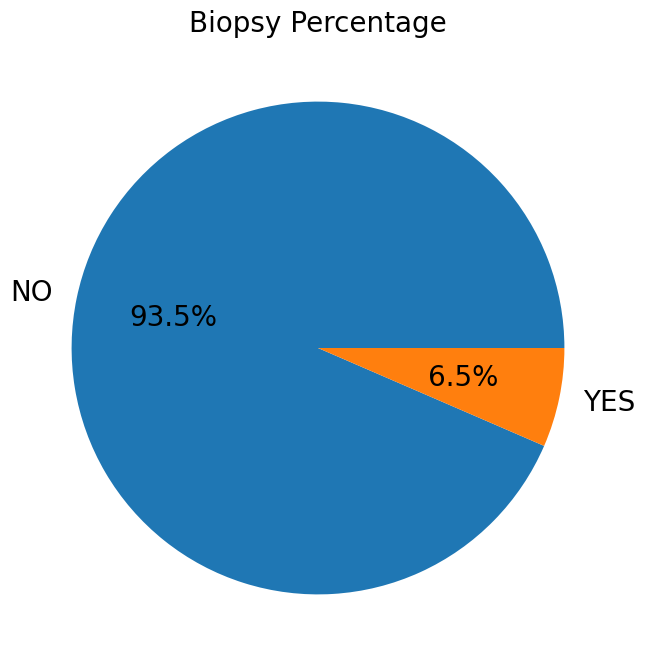

In [38]:
impute = df.copy()
impute=df.astype('float')

plt.figure(figsize = (12,8))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=20)
plt.show()

#### Observation :
    
* So, only 6.4% of the record have positive biopsy result i.e. people having cervical cancer.
* Hence there is a imbalance in the data which needs to taken care in model building section.

Count Plots of Categorical Columns

****************************************************************************************************


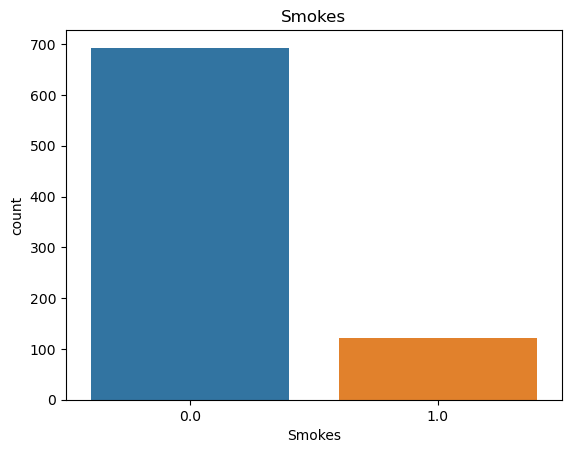

****************************************************************************************************


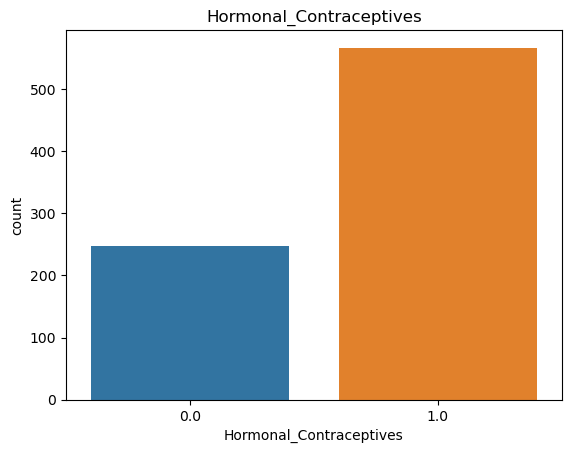

****************************************************************************************************


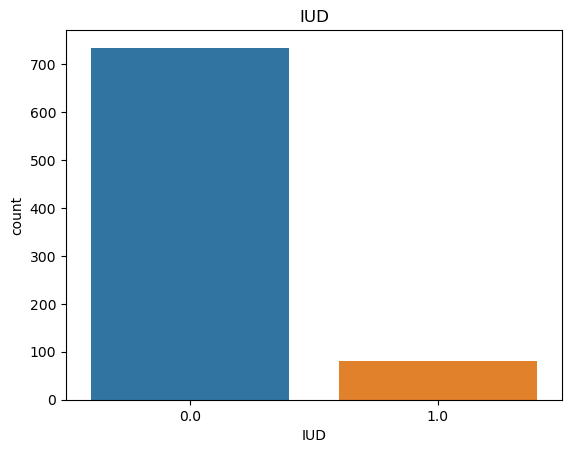

****************************************************************************************************


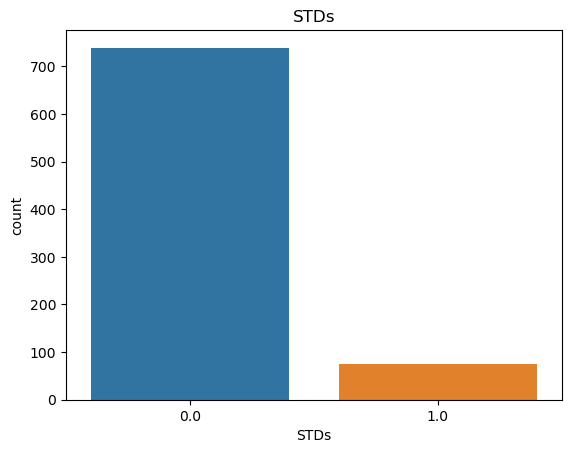

****************************************************************************************************


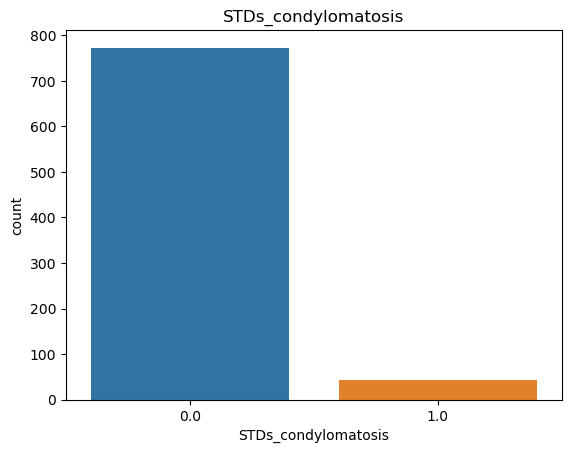

****************************************************************************************************


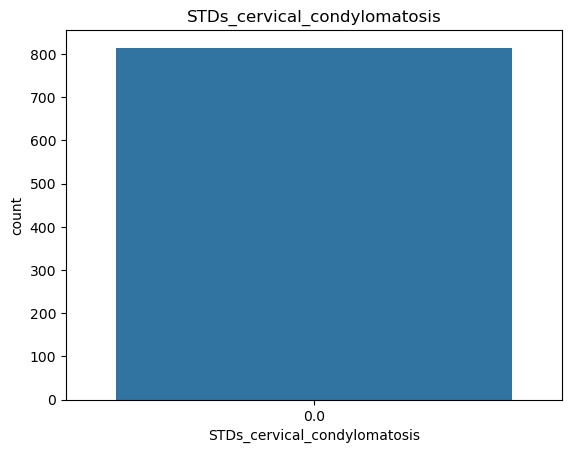

****************************************************************************************************


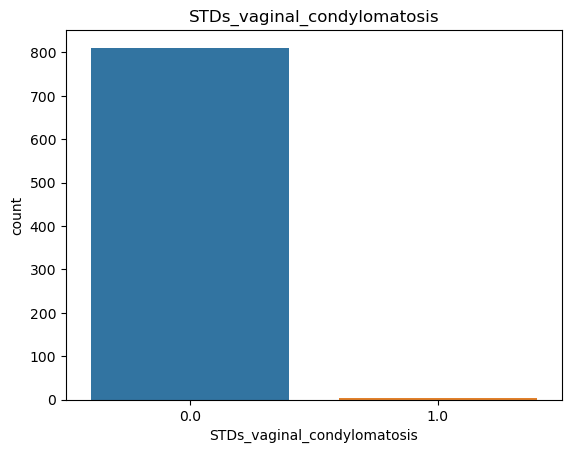

****************************************************************************************************


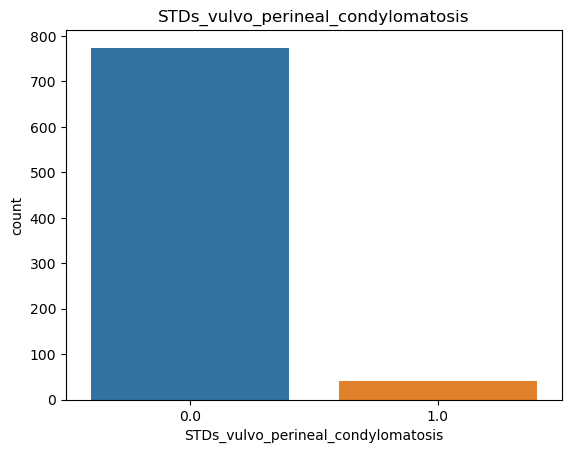

****************************************************************************************************


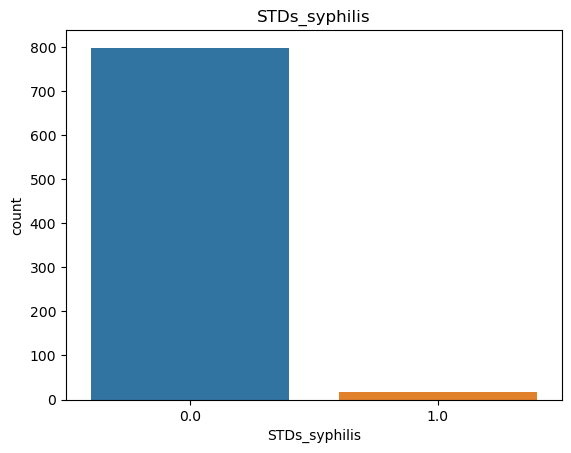

****************************************************************************************************


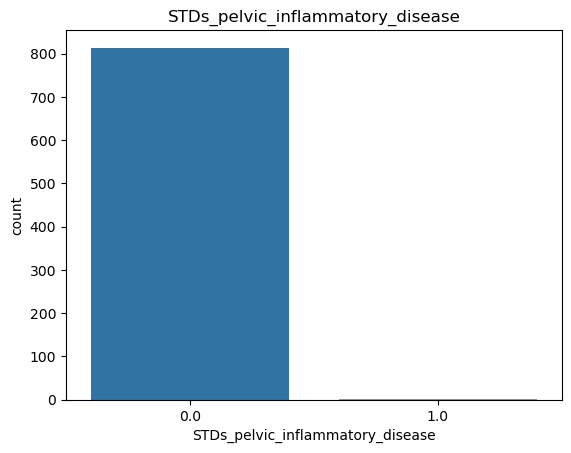

****************************************************************************************************


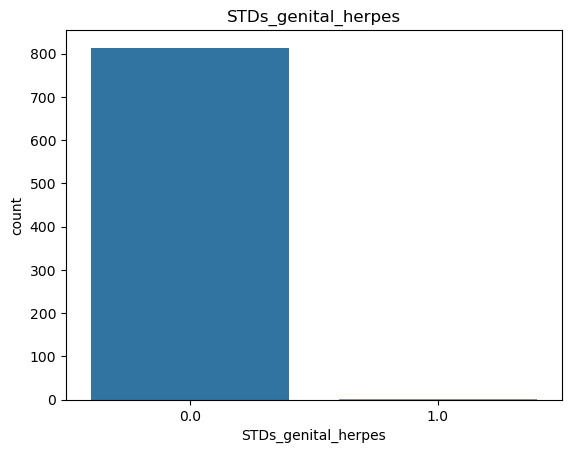

****************************************************************************************************


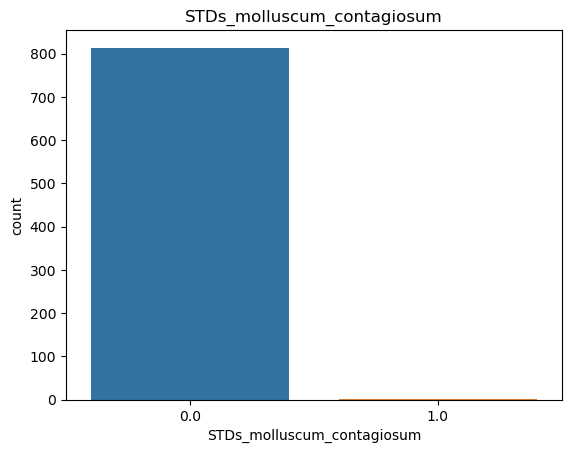

****************************************************************************************************


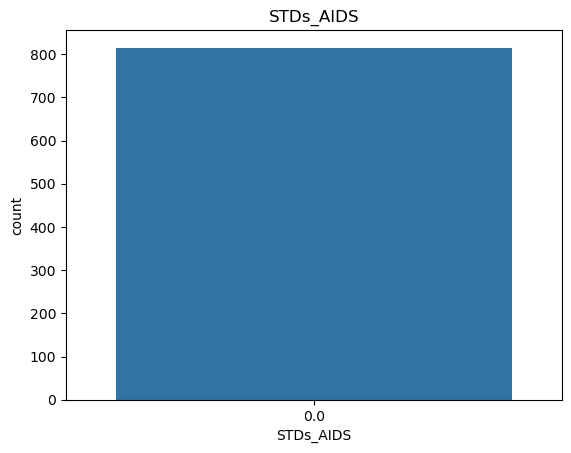

****************************************************************************************************


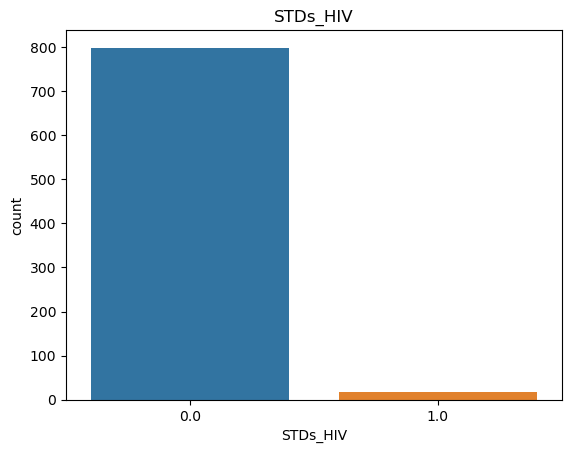

****************************************************************************************************


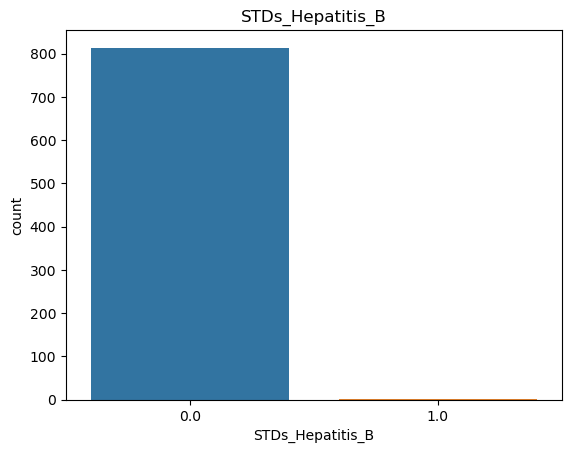

****************************************************************************************************


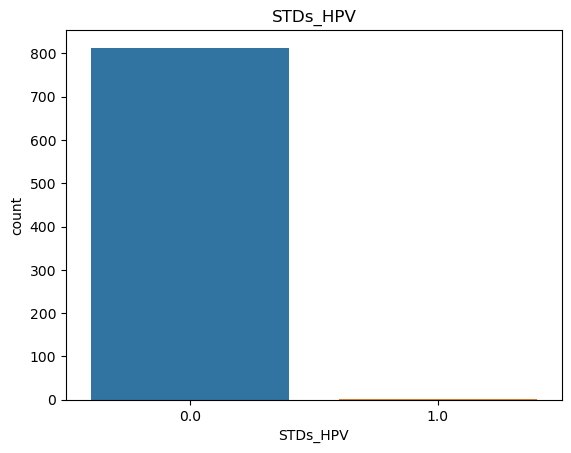

****************************************************************************************************


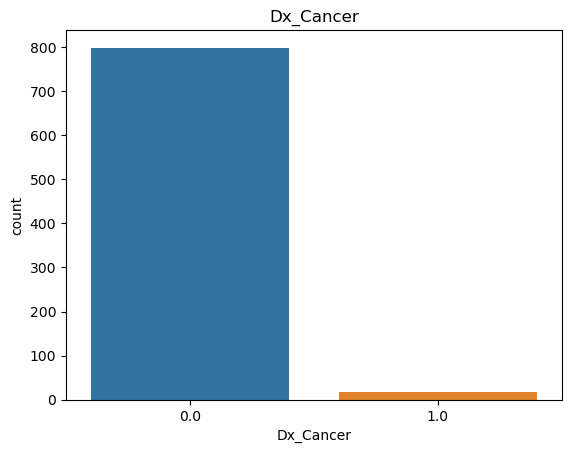

****************************************************************************************************


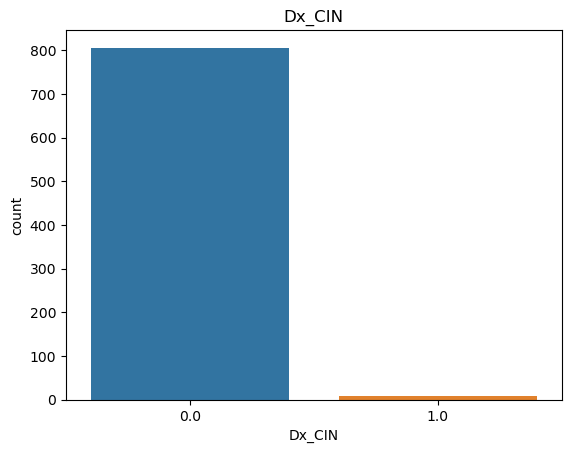

****************************************************************************************************


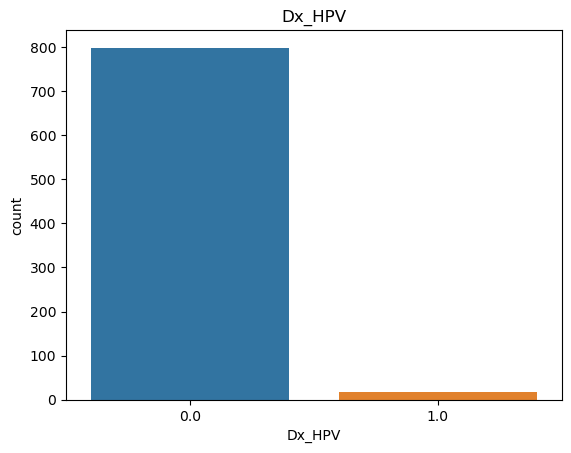

****************************************************************************************************


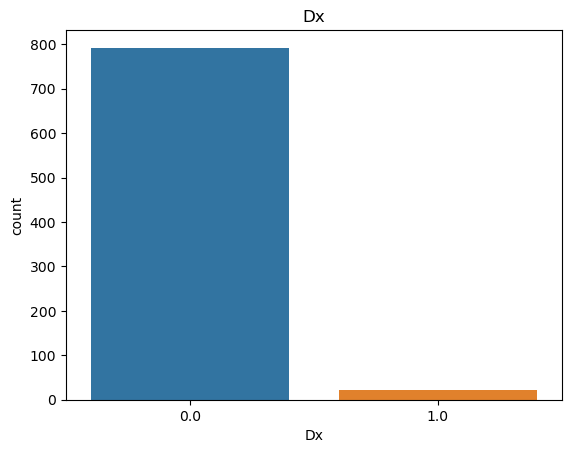

****************************************************************************************************


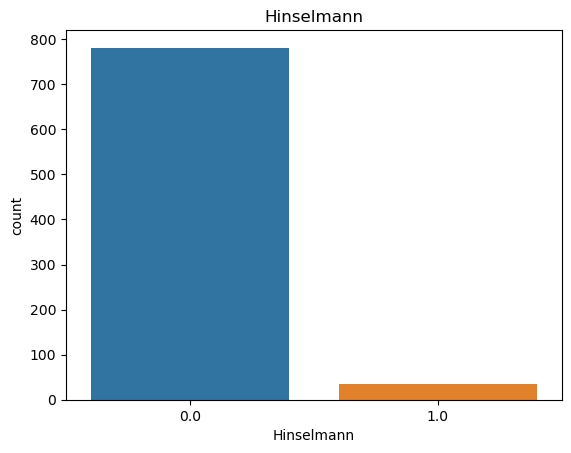

****************************************************************************************************


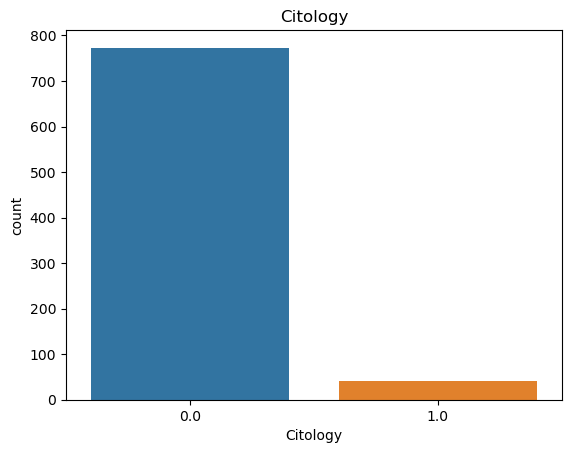

****************************************************************************************************


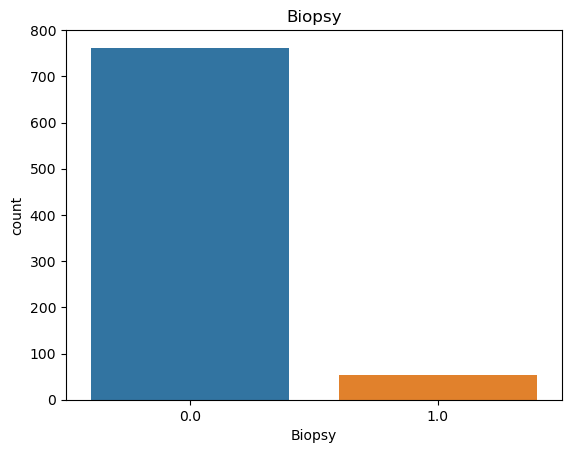

In [39]:
print("Count Plots of Categorical Columns");print()
for i in impute[x_features_categorical]:
        print('*'*100)
        sns.countplot(impute[i])
        plt.title(i)
        plt.show()

Density Plots

****************************************************************************************************


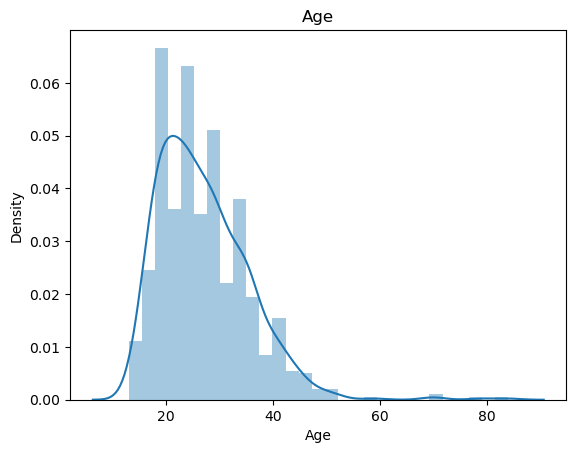

****************************************************************************************************


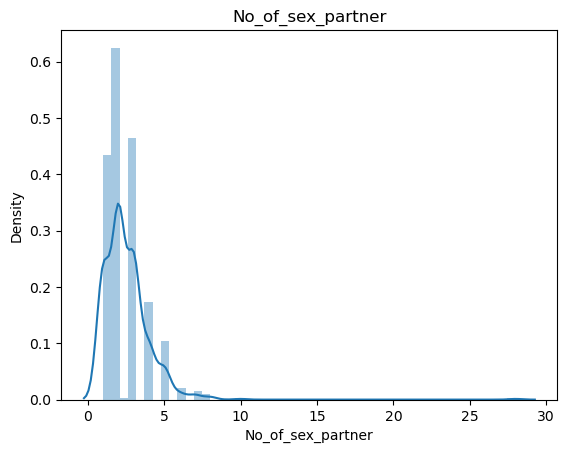

****************************************************************************************************


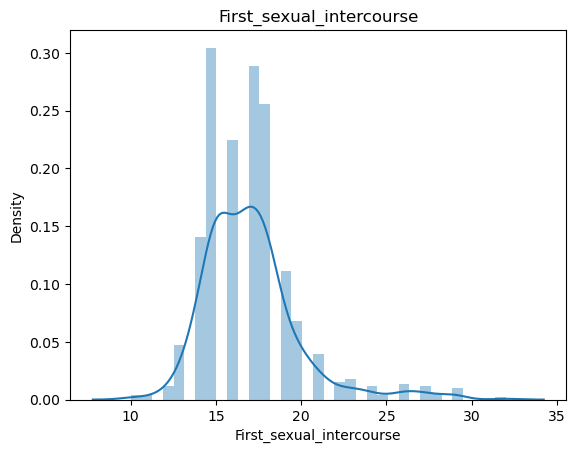

****************************************************************************************************


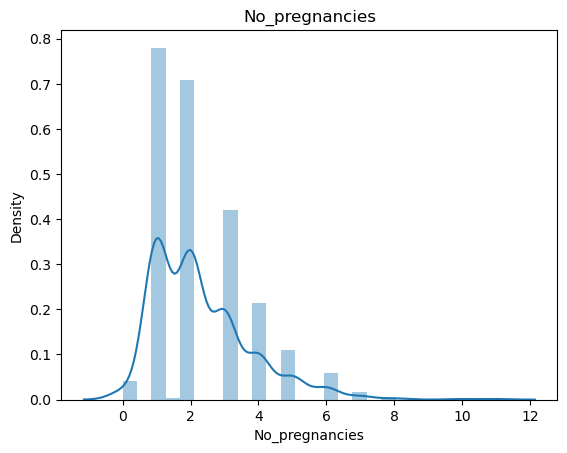

****************************************************************************************************


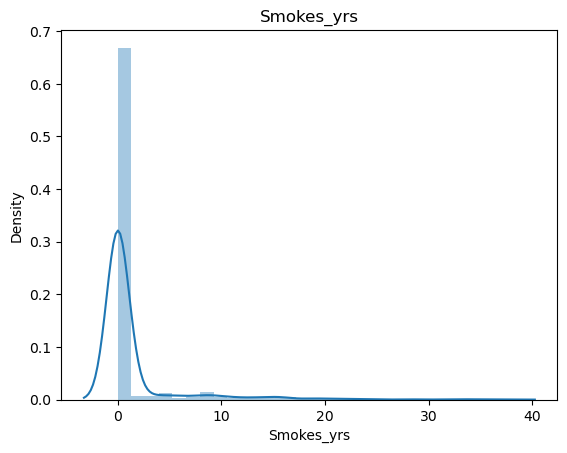

****************************************************************************************************


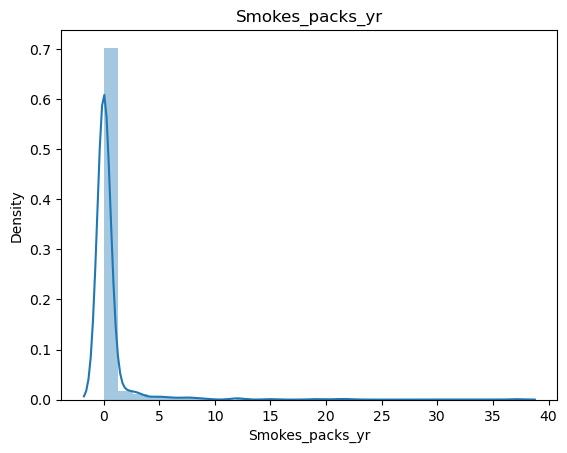

****************************************************************************************************


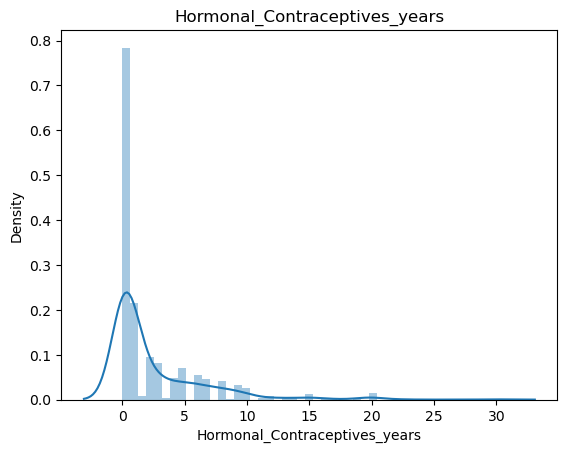

****************************************************************************************************


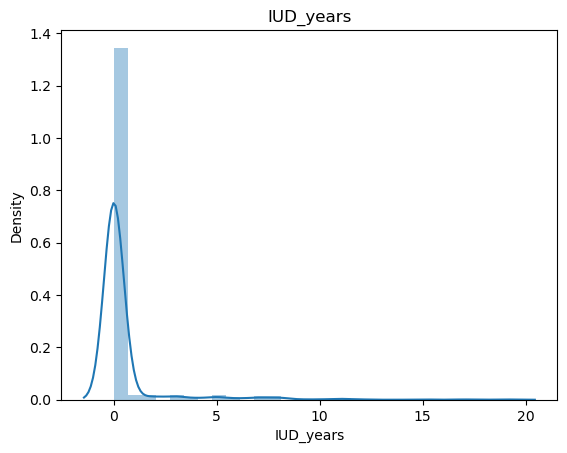

****************************************************************************************************


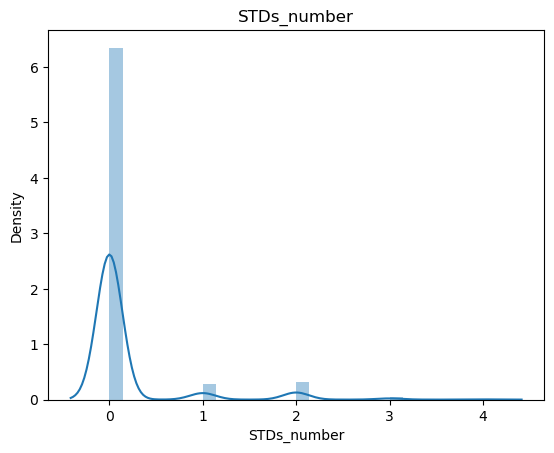

****************************************************************************************************


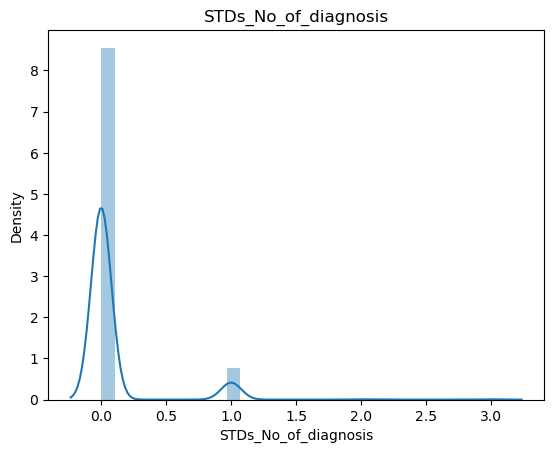

****************************************************************************************************


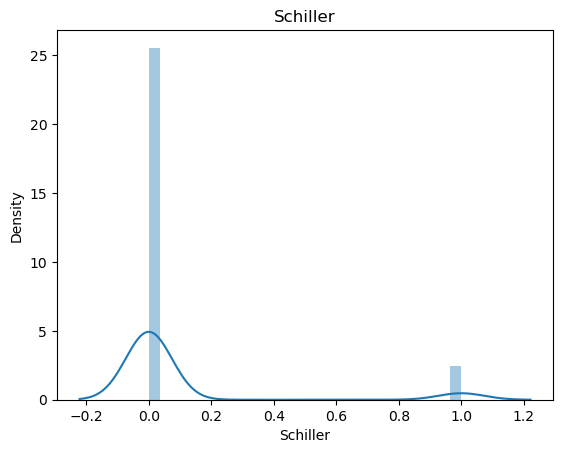

In [40]:
print("Density Plots");print()
for i in impute[x_features_numerical]:
        print('*'*100)
        sns.distplot(impute[i])
        plt.title(i)
        plt.show()

### Inference :
    
* Most of the patients are in the age group 20 -40.
    
* We have just grouped the overall features  as :
        
    1. Sexual habits attributes
    2. Smoking habits attributes
    3. Birth control attributes
    4. STD attributes
    
#### Smoking Habits :
* Relatively larger proportion of the patients are non smokers (around 700) and only a very few (around 100) are smokers.
  
#### Sexual Habits :
* Predominant of the patients had 0 -5  sexual partners.
* Most of them had their first sexual intercourse between 15 - 20 years.
* The larger group of patient had 1 -3 pregancies overall in their life.
       
#### Birth Control Habits :
* Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.
* Generally most patients have used birth control methods only for less than 2 years while very few of them have used  more than 2 years.
        
#### Sexually Transmitted Diseases :
* The countplot above depicts that only a very very people are affected by any one of the STDs.
* So clearly there's an imbalance here and hence we can suggest that the STD attributes may have significant role while building the models.
 
     

****************
## Multivariate Analysis 
Multivariate analysis is a set of statistical techniques used for analysis of data that contain more than one variable. Multivariate analysis refers to any statistical technique used to analyse more complex sets of data.

Binning the columns that deals with years

In [41]:
impute[x_features_categorical]=impute[x_features_categorical].replace(0,'no')
impute[x_features_categorical]=impute[x_features_categorical].replace(1,'yes')

impute.Smokes_yrs=impute.Smokes_yrs.astype('float64')
impute.IUD_years=impute.IUD_years.astype('float64')
impute.Smokes_packs_yr=impute.Smokes_packs_yr.astype('float64')
impute['smokes_yr_cat']=pd.cut(impute.Smokes_yrs,[-1,2,5,10,15,20,25,50],labels=['<2','2-5','5-10','10-15','15-20','20-25','>25'])
impute=impute.drop(['Smokes_yrs'],axis=1)
impute['smokepack_yr_cat']=pd.cut(impute.Smokes_packs_yr,[-1,2,5,10,20,50],labels=['<2','2-5','5-10','10-20','>20'])
impute=impute.drop(['Smokes_packs_yr'],axis=1)
impute['IUD_years_bin']=pd.cut(impute.IUD_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])
impute=impute.drop(['IUD_years'],axis=1)
impute['Hormonal_years_bin']=pd.cut(impute.Hormonal_Contraceptives_years,[-1,2,4,6,8,10,15,20],labels=['<2','2-4','4-6','6-8','8-10','10-15','>15'])

### i) Age and Sexual Habits vs Biopsy

##### No_of_sex_partner - Total number of sexual partners the patient had.
##### First_sexual_intercourse - The age when the patient had their first sexual intercourse
##### No_pregnancies - Total number of pregnancies the patient had

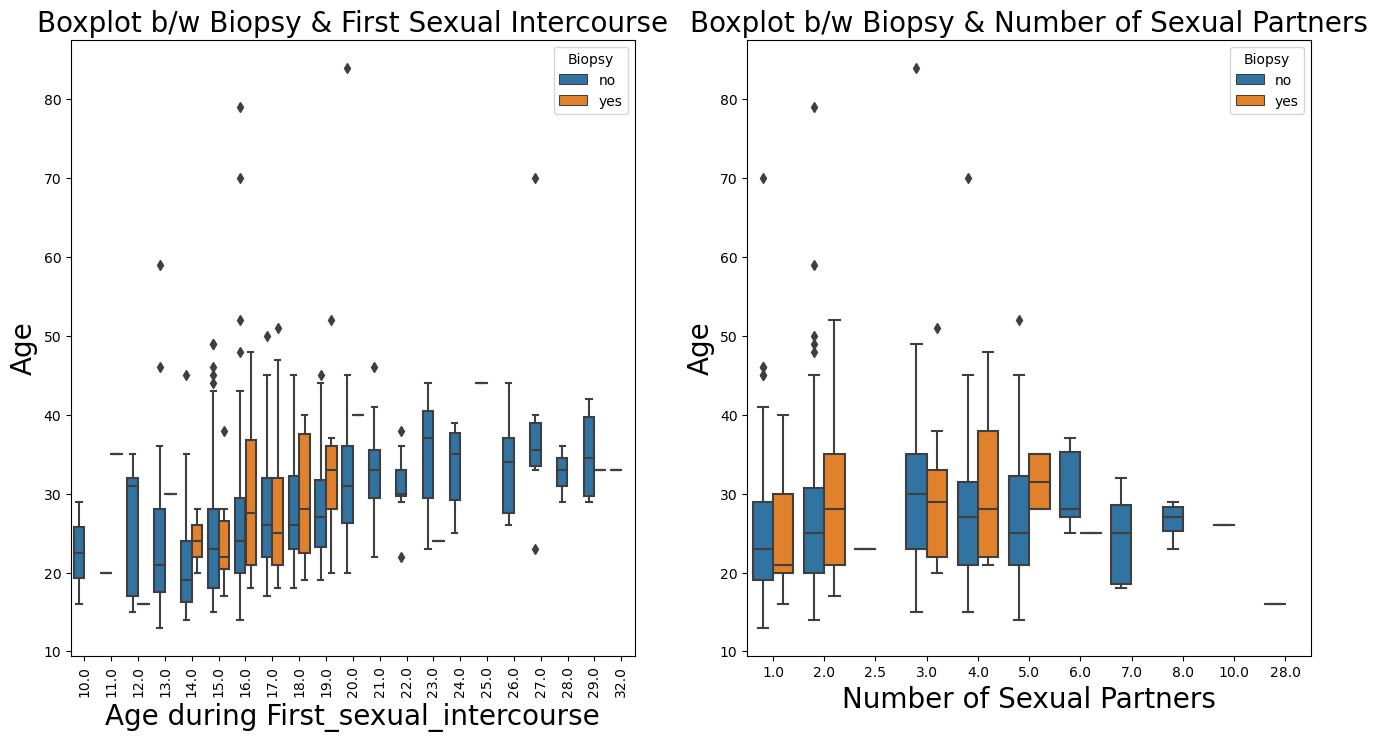

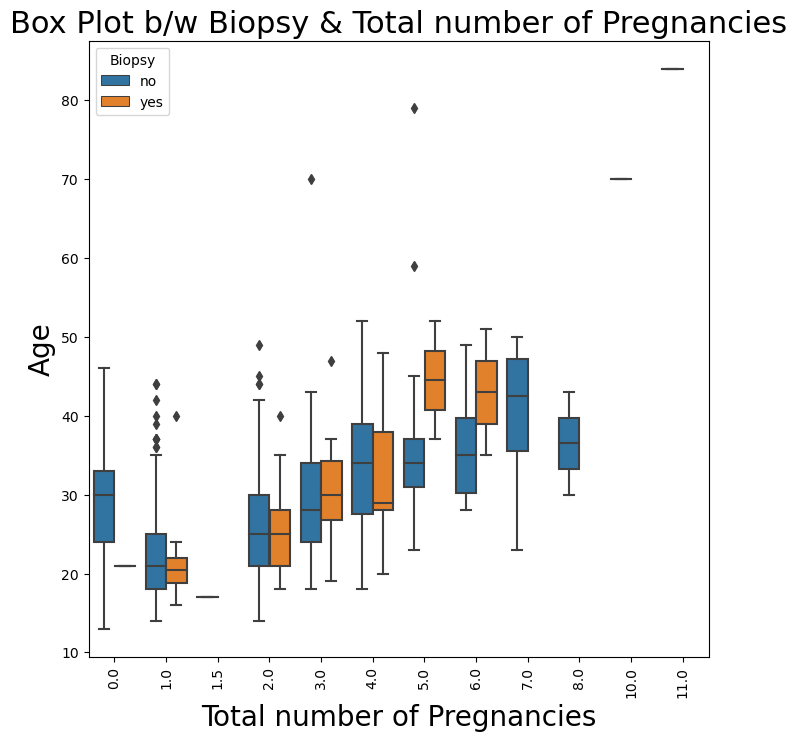

In [42]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(x=impute['First_sexual_intercourse'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Boxplot b/w Biopsy & First Sexual Intercourse",fontsize=20)
a.set_xlabel("Age during First_sexual_intercourse",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Boxplot b/w Biopsy & Number of Sexual Partners',fontsize=20)
a=sns.boxplot(x=impute['No_of_sex_partner'],y=impute['Age'], hue=impute['Biopsy'])
a.set_xlabel("Number of Sexual Partners",fontsize=20)
a.set_ylabel("Age",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
a=sns.boxplot(x=impute['No_pregnancies'],y=impute['Age'], hue=impute['Biopsy'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=22)
a.set_xlabel('Total number of Pregnancies',fontsize=20)
plt.xticks(rotation=90)
a.set_ylabel("Age",fontsize=20)
plt.show()

##### Inferences :

* Those who had their first sexual intercourse in between 15 and 18 years of their life are more prone to be tested positive with Biopsy test and those people are predominantly in the age group of 20 to 35.
* The persons who have sexual partners between 1 & 3 are more prone to be testes as positive in Biopsy test and they are predominantly in the age group of 20 to 35.
* Higher the number of pregancies, higher the chances of getting positive Biopsy test.

### ii) Smoking and Sexual Habits vs Biopsy

*  Smokes - It indicates whether the person smokes or not
*  smokes_yr_cat - It indicates for how many years the person has been smoking
*  smokepack_yr_cat - It indicates how many packets per year the person is smoking

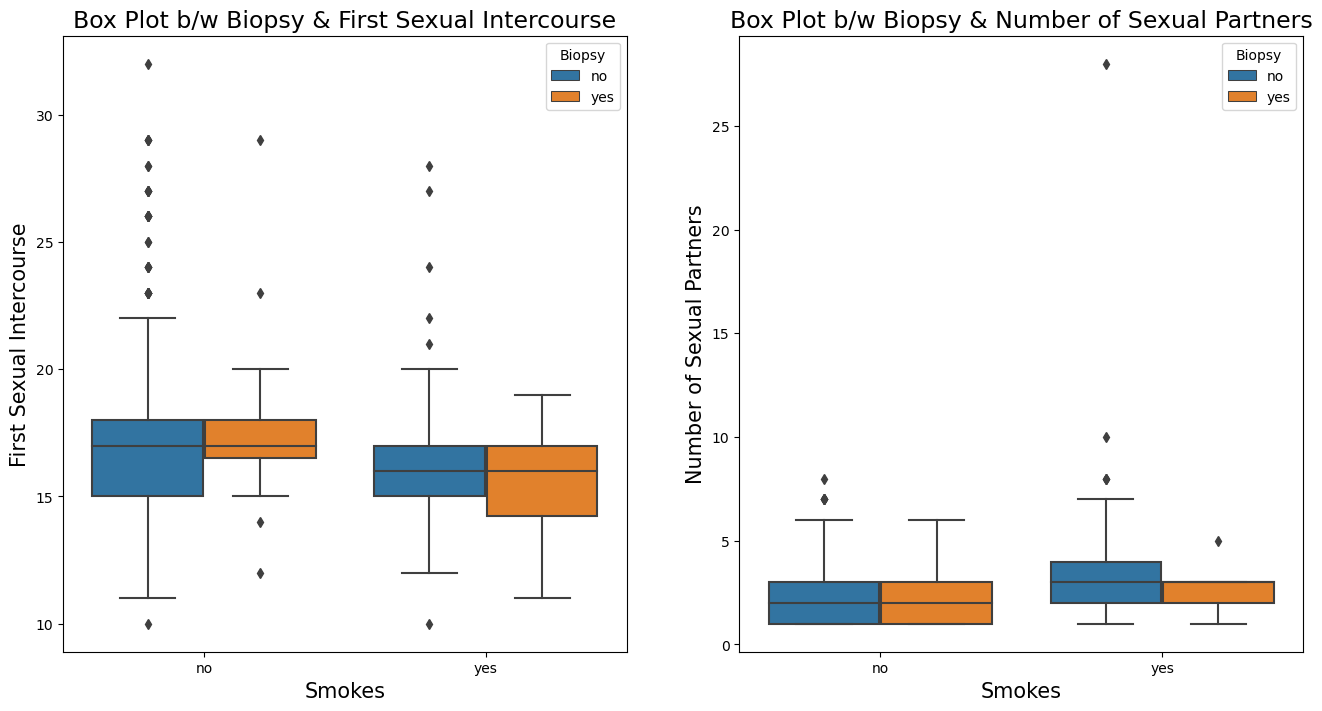

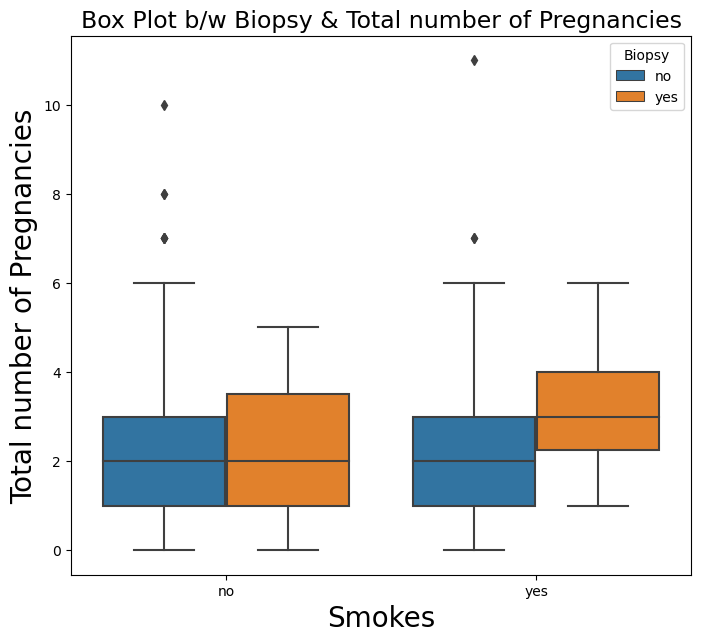

In [43]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
a=sns.boxplot(y=impute['First_sexual_intercourse'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & First Sexual Intercourse",fontsize=17)
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("First Sexual Intercourse",fontsize=15)
plt.subplot(1,2,2)
plt.title('Box Plot b/w Biopsy & Number of Sexual Partners',fontsize=17)
a=sns.boxplot(y=impute['No_of_sex_partner'],hue=impute['Biopsy'],x=impute['Smokes'])
a.set_xlabel("Smokes",fontsize=15)
a.set_ylabel("Number of Sexual Partners",fontsize=15)
plt.figure(figsize=(8,7))
a=sns.boxplot(y=impute['No_pregnancies'],hue=impute['Biopsy'],x=impute['Smokes'])
a.axes.set_title("Box Plot b/w Biopsy & Total number of Pregnancies",fontsize=17)
a.set_xlabel('Smokes',fontsize=20)
a.set_ylabel("Total number of Pregnancies",fontsize=20)
plt.show()

##### Inference :

* Those who smoke and had their first sexual intercourse in younger age between 15yrs and 18yrs are more prone to be test as Positive in Biopsy test.
* There is no clear relation between smoking and number of sex partners as the smoking cancer patients and non smoking patients, both have nearly same number of sex partners.
* The person who smokes and have higher number of pregnancies are more prone to be tested as positive in Biopsy test.

### ii) Age and Smoking Habits vs Biopsy

* Smokes - It indicates whether the person smokes or not
* smokes_yr_cat - It indicates for how many years the person has been smoking
* smokepack_yr_cat - It indicates how many packets per year the person is smoking

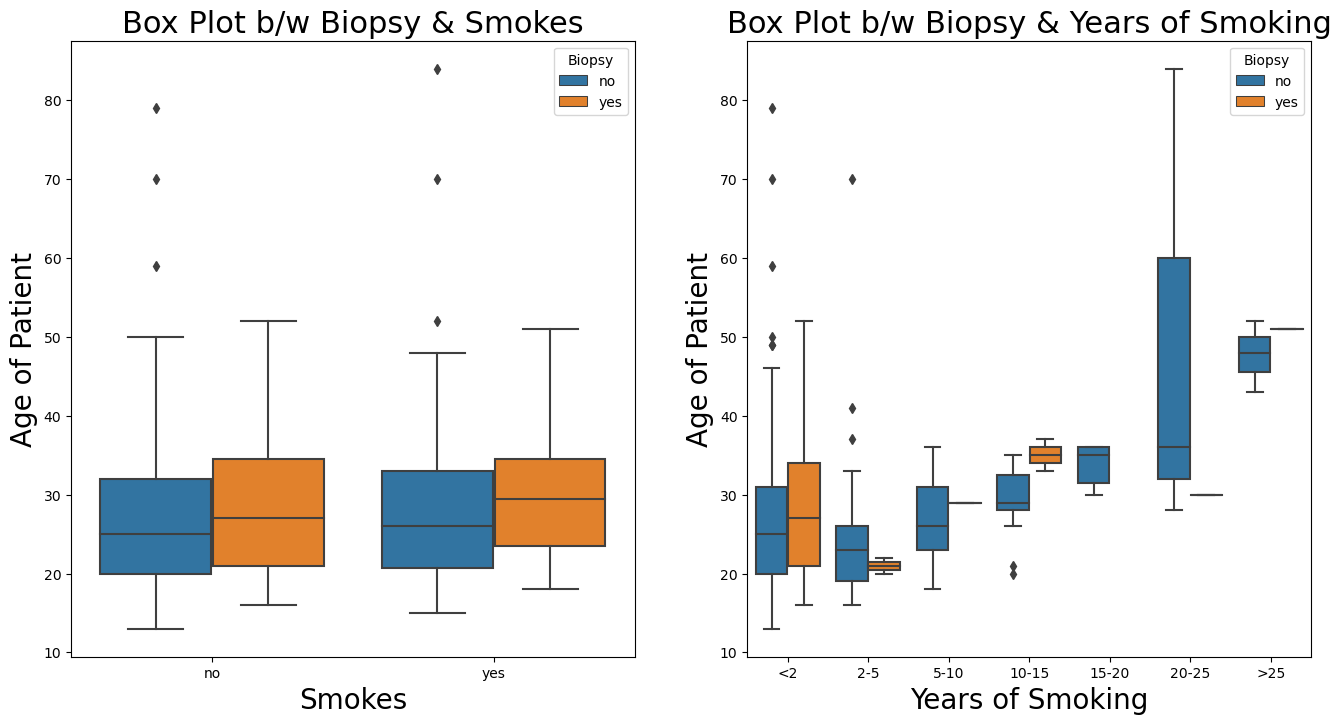

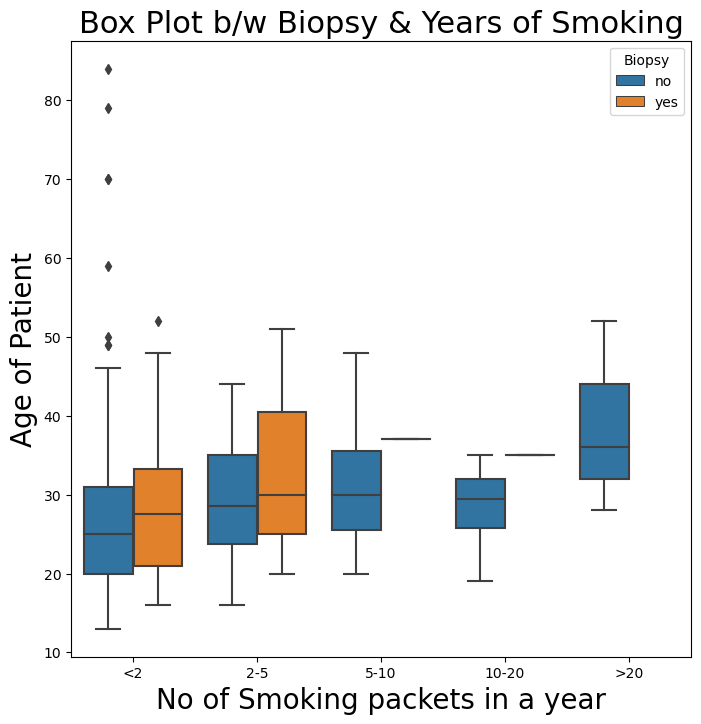

In [44]:
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['Smokes'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Smokes",fontsize=22)
b.set_xlabel("Smokes",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.subplot(1,2,2)
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokes_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("Years of Smoking",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()
plt.figure(figsize=(8,8))
b=sns.boxplot(hue=impute['Biopsy'],x=impute['smokepack_yr_cat'],y=impute['Age'])
b.axes.set_title("Box Plot b/w Biopsy & Years of Smoking",fontsize=22)
b.set_xlabel("No of Smoking packets in a year",fontsize=20)
b.set_ylabel("Age of Patient",fontsize=20)
plt.show()

##### Inferences :

*  Cancer can affect to non-smokers as well and even in the young age (around 22 years) and the average age of Smoking cancer patients are higher than those of non smoking cancer patients. So the smoking people who are aged high are more prone to be test as positive.
* The person who has smoked for atleast one year are more prone to be test as positive in Biopsy test
* The person who are aged high and smoke more number of packets a year are prone to be tested as postive in Biopsy test

### iii) Birth control attributes & Age vs Biopsy

* Hormonal_Contraceptives - Indicates usage of the contraceptives or not
* Hormonal_Contraceptives_years - It indicates the years in usage of the contraceptives
* IUD - It indicates the usage of IUD contraceptives (A small, often T-shaped birth control device that is inserted into a woman's uterus to prevent pregnancy) or not
* IUD_years_bin - It indicates the years in usage of the IUD contraceptives
* Hormonal_years_bin - It indicates the years in usage of the hormonal contraceptives

<AxesSubplot:xlabel='IUD_years_bin', ylabel='count'>

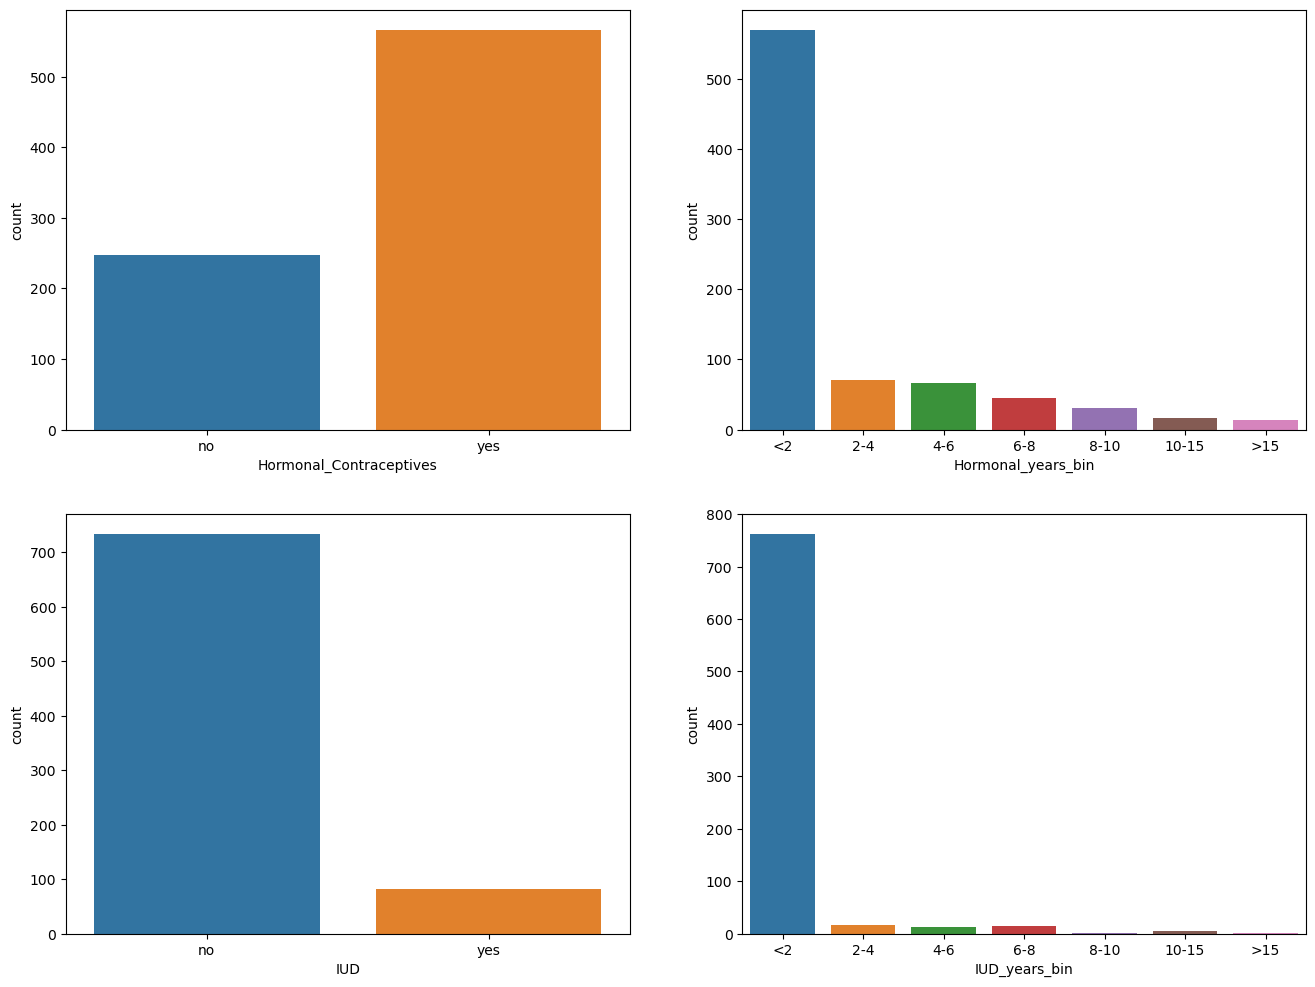

In [45]:
plt.subplots(2,2,figsize=(16,12))
plt.subplot(2,2,1)
sns.countplot(impute['Hormonal_Contraceptives'])
plt.subplot(2,2,2)
sns.countplot(impute['Hormonal_years_bin'])
plt.subplot(2,2,3)
sns.countplot(impute['IUD'])
plt.subplot(2,2,4)
sns.countplot(impute['IUD_years_bin'])

##### Inferences:

* Most of the patients have used Hormonal contraceptives methods like pills and medications for birth controls where only a few of them have opted for intrauterine devices (IUDs). The reason for this is may be that hormonal contraceptives are readily available in shops (needs presciption) and one can take those at their home on their own with some sort of guidance where as IUD needs an doctor supervision and the patient needs to be in hospital.
    
* Generally most patients have used birth control methods only for less than 2 years while very few of them have used  upto 8

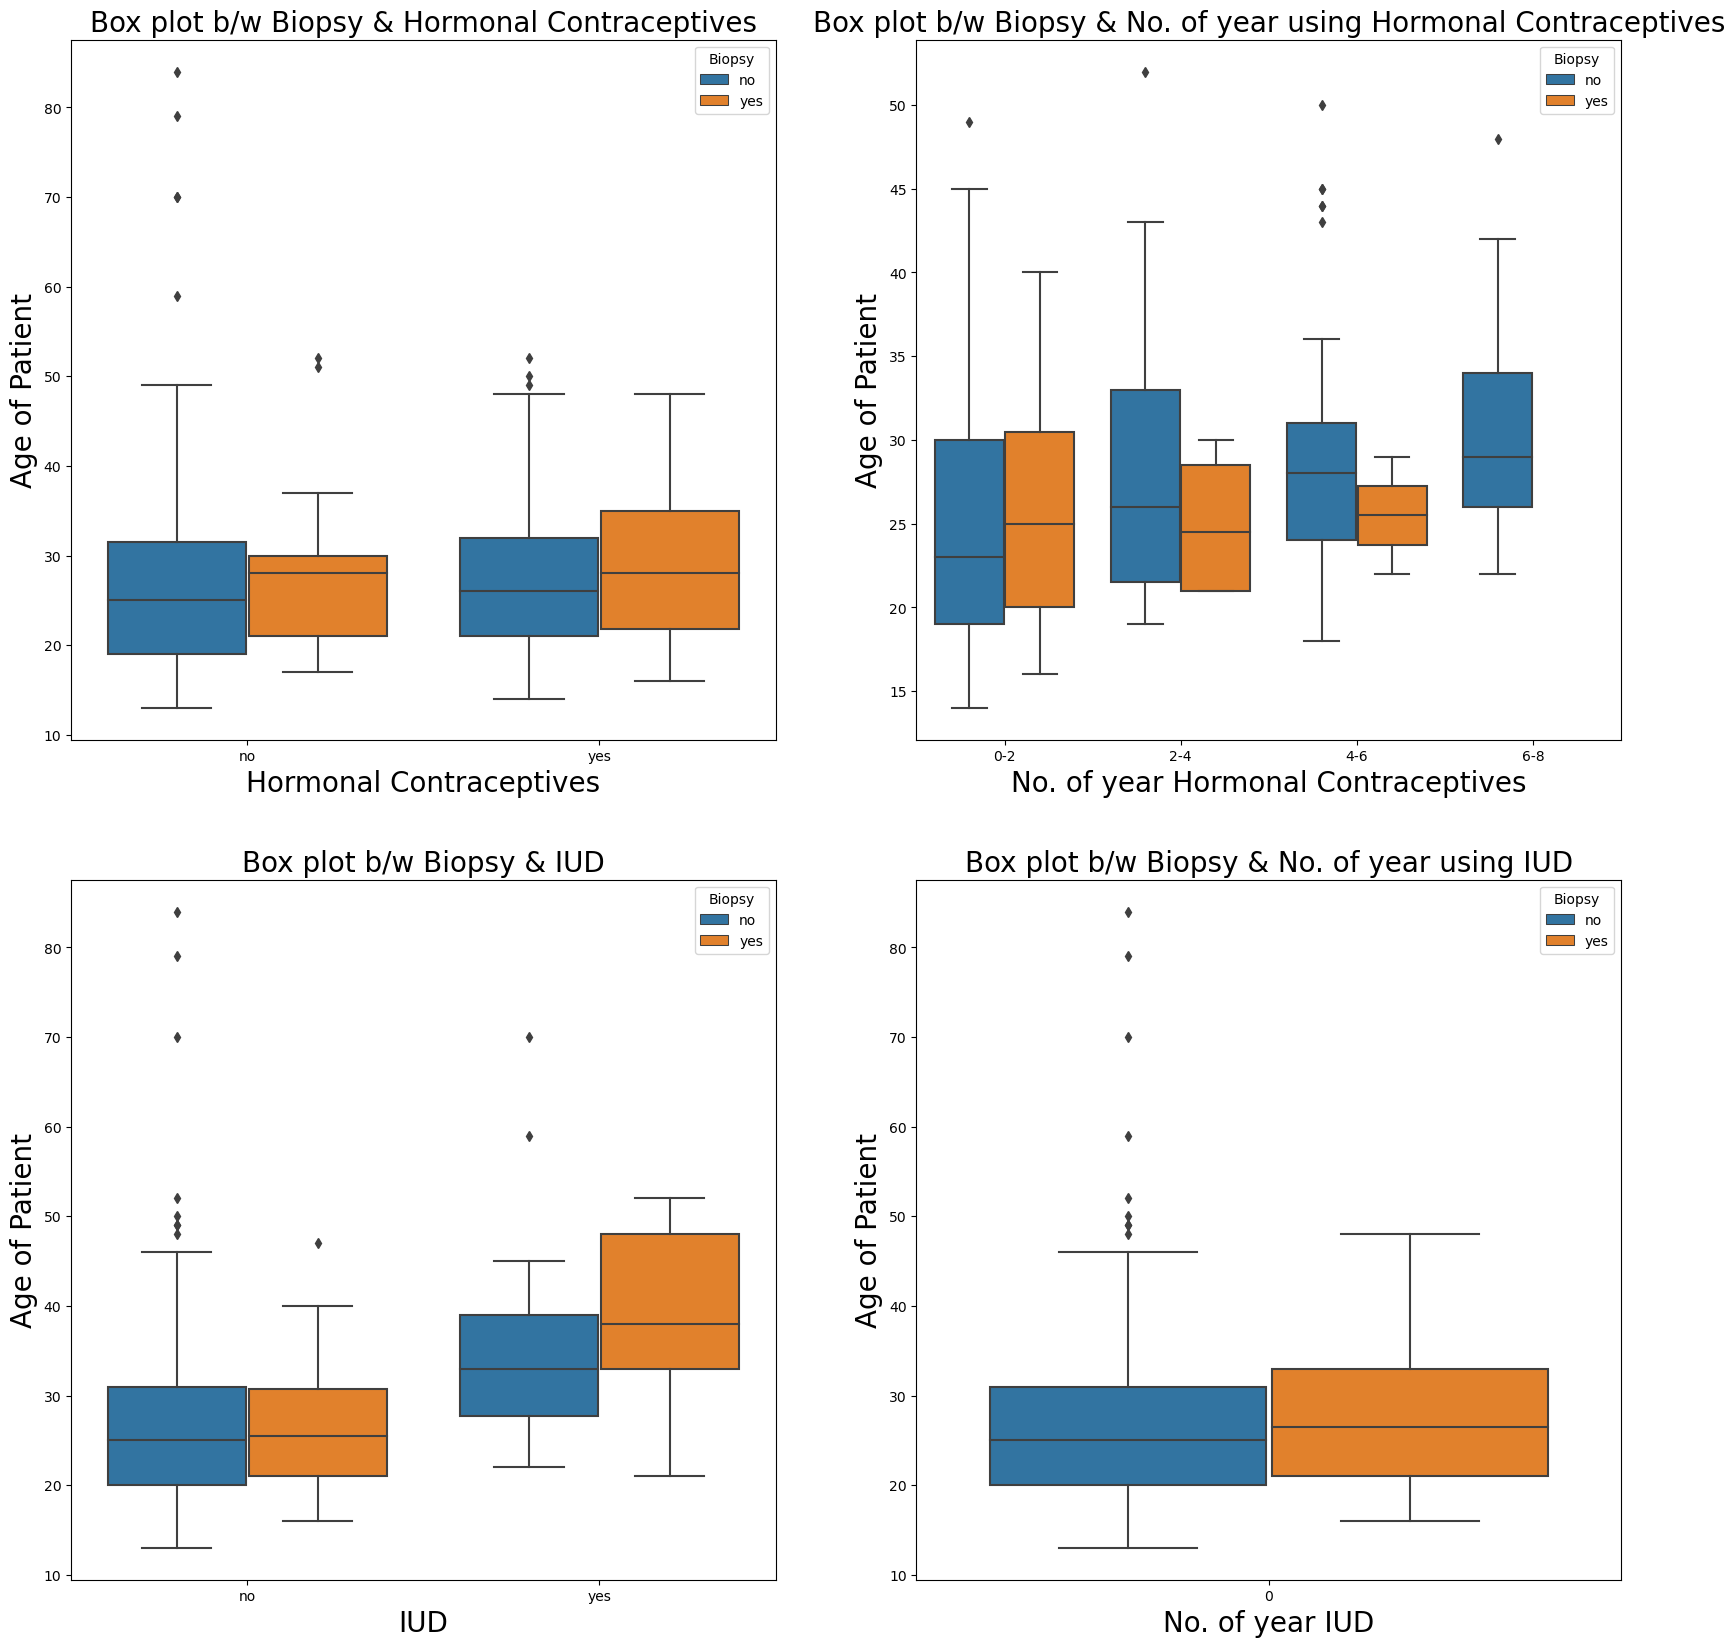

In [46]:
plt.subplots(2,2,figsize=(20,20))
plt.subplot(2,2,1)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['Hormonal_Contraceptives'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & Hormonal Contraceptives',fontsize=20)
c.set_xlabel('Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,2)
years=pd.cut(impute.Hormonal_Contraceptives_years,[0,2,4,6,8],labels=['0-2','2-4','4-6','6-8'])
c=sns.boxplot(x=years,y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using Hormonal Contraceptives',fontsize=20)
c.set_xlabel('No. of year Hormonal Contraceptives',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,3)
c=sns.boxplot(hue=impute['Biopsy'],x=impute['IUD'],y=impute['Age'])
c.axes.set_title('Box plot b/w Biopsy & IUD',fontsize=20)
c.set_xlabel('IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
plt.subplot(2,2,4)
c=sns.boxplot(x='IUD_years_bin',y='Age',hue='Biopsy',data=impute)
c.axes.set_title('Box plot b/w Biopsy & No. of year using IUD',fontsize=20)
c.set_xlabel('No. of year IUD',fontsize=20)
c.set_ylabel('Age of Patient',fontsize=20)
c=sns.boxplot()
plt.show()

##### Inferences :

* The persons who did not use the hormonal contraceptives and with more age are high in number, who show positive for Biopsy test
* The patients with 0-4 years of usage in hormonal contraceptives and the average age between 20yrs & 30yrs show positive for Biopsy test.
* The persons who did not use IUD and with lesser age between 25 years & 35 years, show positive for Biopsy test where as among those who used IUD, the higg aged people (around 40) are more prone to cancer.


### iv) STD attributes & Age vs Biopsy


    STDs : Indicates the presence of Sexually Transmitted Diseases
    STDs_number : Indicates the total number of sexually transmitted disease present with the patient
    STDs_condylomatosis
    STDs_cervical_condylomatosis
    STDs_vaginal_condylomatosis
    STDs_vulvo_perineal_condylomatosis
    STDs_syphilis
    STDs_pelvic_inflammatory_disease
    STDs_genital_herpes
    STDs_molluscum_contagiosum
    STDs_AIDS
    STDs_HIV
    STDs_Hepatitis_B
    STDs_HPV
    STDs_No_of_diagnosis

<AxesSubplot:xlabel='STDs_number', ylabel='count'>

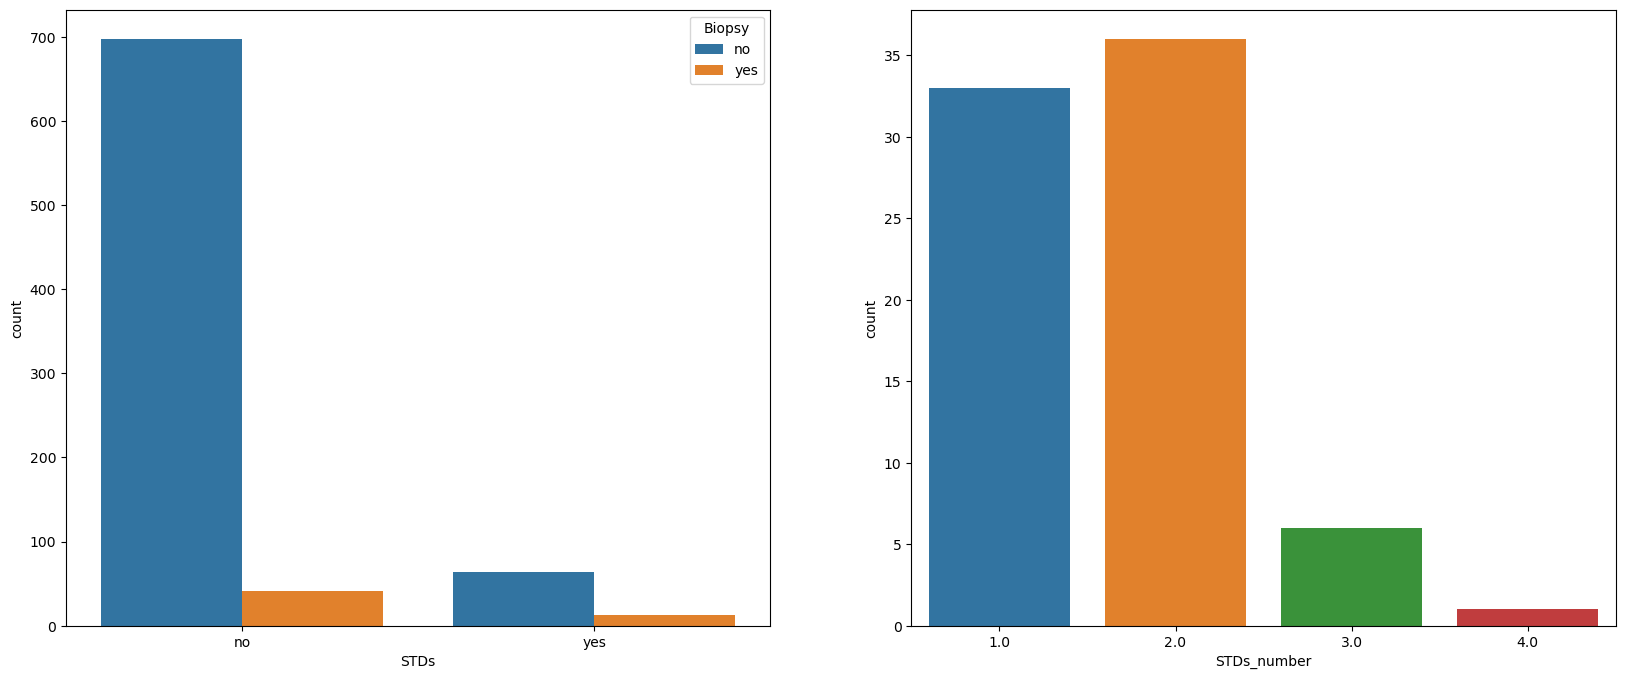

In [47]:
plt.subplots(1,2, figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(impute['STDs'], hue=impute['Biopsy'])
plt.subplot(1,2,2)
sns.countplot(impute['STDs_number'][impute['STDs_number']>0])

##### Inferences :

* There is a huge difference between the proportions of the count of STDs i.e. clearly a very high percent of patients are not affected with any sexual diseases and onlly a very few (less than 100) are infected with those. So there's clearly an imbalance over here and so we can infer may be STD features won't be of much useful while building the models.
* Even among those who have any of the disease, only a very very few of them are tested positive.
* Also among thse STD people, most of them have either 1 or 2 sexual disease.

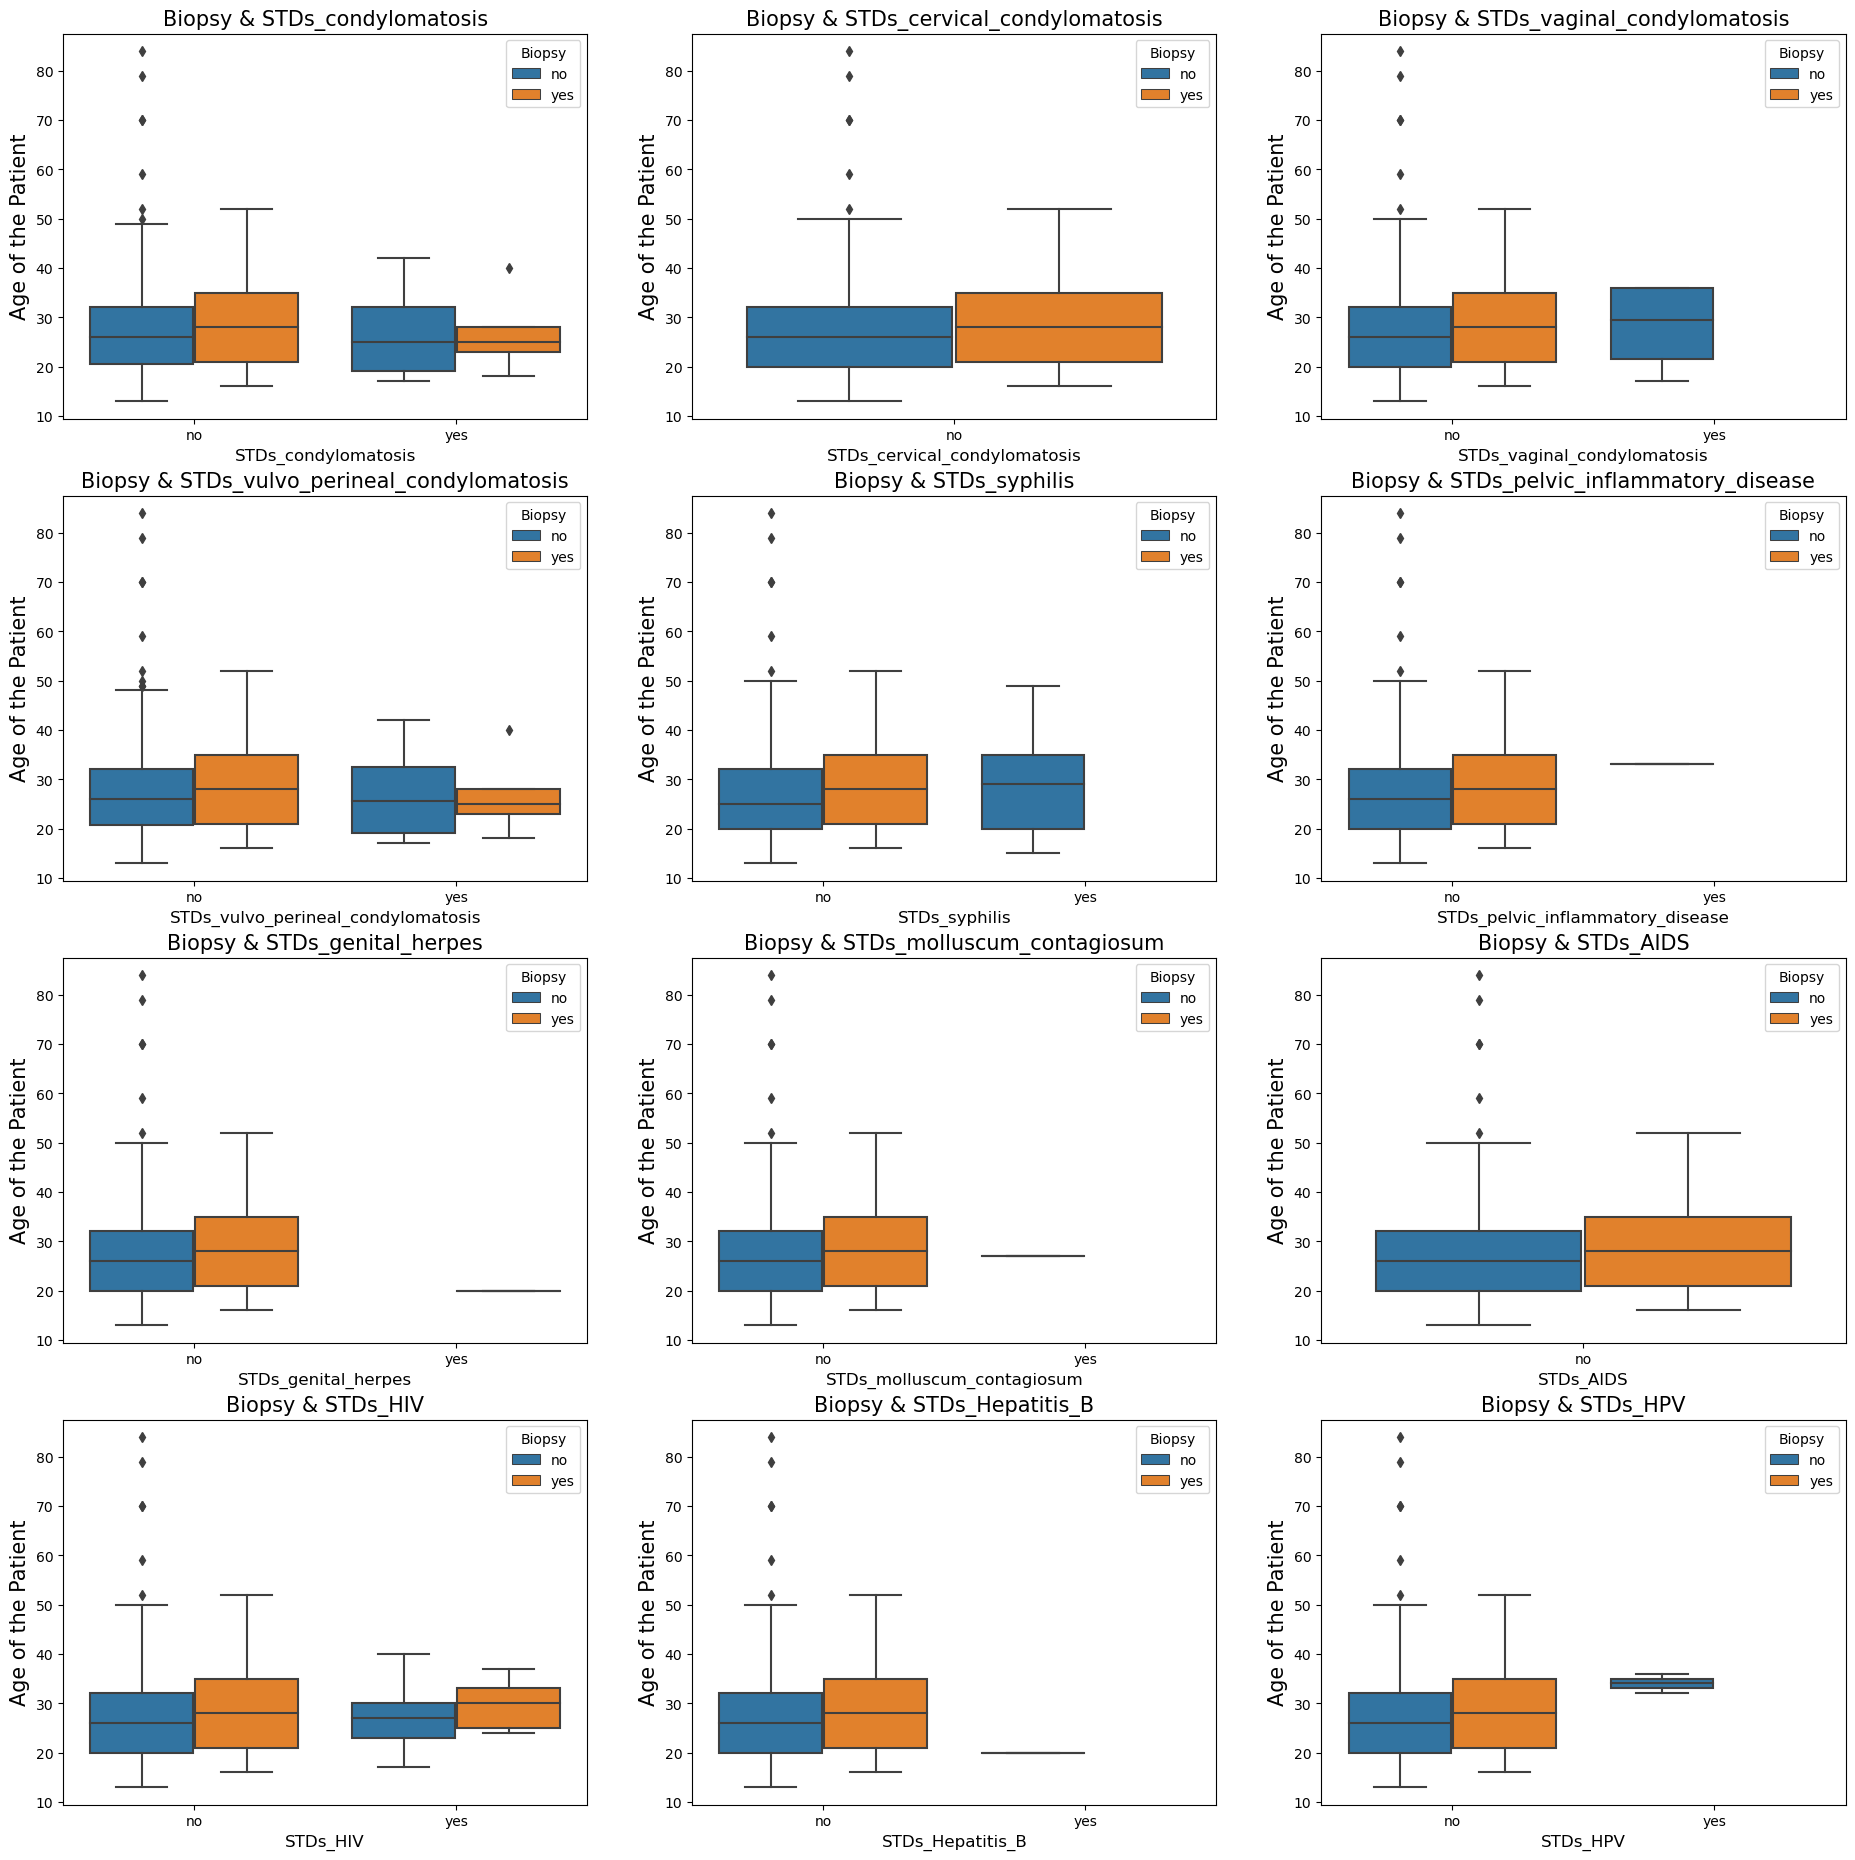

In [48]:
plt.subplots(4,3,figsize=(23,23))
var=['Dummy','STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV']
for i in np.arange(1,13):
    plt.subplot(4,3,i)
    d=sns.boxplot(hue='Biopsy',x=var[i],y='Age',data=impute)
    d.axes.set_title('Biopsy & ' + var[i],fontsize=15)
    d.set_xlabel(var[i],fontsize=12)
    d.set_ylabel('Age of the Patient',fontsize=15)

##### Inferences :

* In all the plots we can clearly the person with higher age are prone to be tested as Positive in Biopsy test
* We can not predict the effect of individual STDs as the data is not sufficient as there is class in imbalance

****************************
## Feature Engineering
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering turn your inputs into things the algorithm can understand

### Outlier Treatment

In [49]:
numerical=['Age','No_of_sex_partner','First_sexual_intercourse','No_pregnancies','Smokes_yrs','Smokes_packs_yr',
 'Hormonal_Contraceptives_years','IUD_years'] # --> Choosing the proper numerical features 

df_copy = df.copy()
df_copy[numerical]=df_copy[numerical].astype('float64')

Age                                 AxesSubplot(0.125,0.712609;0.168478x0.167391)
No_of_sex_partner                AxesSubplot(0.327174,0.712609;0.168478x0.167391)
First_sexual_intercourse         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
No_pregnancies                   AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Smokes_yrs                          AxesSubplot(0.125,0.511739;0.168478x0.167391)
Smokes_packs_yr                  AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Hormonal_Contraceptives_years    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
IUD_years                        AxesSubplot(0.731522,0.511739;0.168478x0.167391)
dtype: object

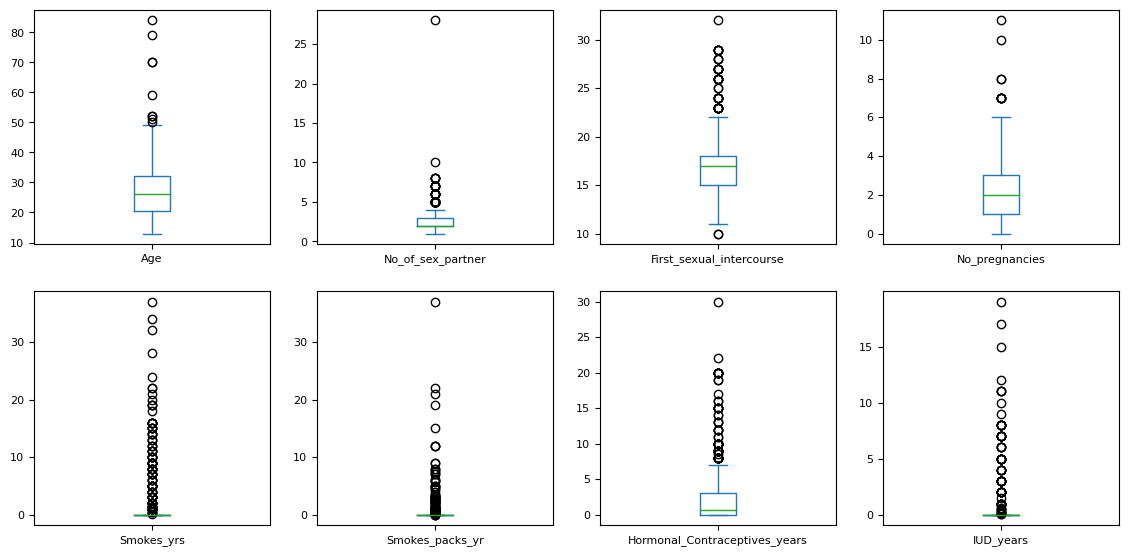

In [50]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

* The above graph implies that the data contains outliers

In [51]:
IQR=df_copy[numerical].describe().T['75%']-df_copy[numerical].describe().T['25%']

min,max=[df_copy[numerical].describe().T['25%']-(IQR*1.5),df_copy[numerical].describe().T['75%']+(IQR*1.5)]

for i in numerical:
    print('range of',i,'b/w',min[i],'and',max[i])

for i in numerical:
    df_copy[i][df_copy[i]>max[i]]=max[i]
    df_copy[i][df_copy[i]<min[i]]=min[i]

range of Age b/w 3.25 and 49.25
range of No_of_sex_partner b/w 0.5 and 4.5
range of First_sexual_intercourse b/w 10.5 and 22.5
range of No_pregnancies b/w -2.0 and 6.0
range of Smokes_yrs b/w 0.0 and 0.0
range of Smokes_packs_yr b/w 0.0 and 0.0
range of Hormonal_Contraceptives_years b/w -4.5 and 7.5
range of IUD_years b/w 0.0 and 0.0


* Here using IQR technique, we have capped the extreme values above the upper whiscur value to the value of upper whiscur and similarly capped the extreme lower values to the value of lower whiscur value

Age                                 AxesSubplot(0.125,0.712609;0.168478x0.167391)
No_of_sex_partner                AxesSubplot(0.327174,0.712609;0.168478x0.167391)
First_sexual_intercourse         AxesSubplot(0.529348,0.712609;0.168478x0.167391)
No_pregnancies                   AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Smokes_yrs                          AxesSubplot(0.125,0.511739;0.168478x0.167391)
Smokes_packs_yr                  AxesSubplot(0.327174,0.511739;0.168478x0.167391)
Hormonal_Contraceptives_years    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
IUD_years                        AxesSubplot(0.731522,0.511739;0.168478x0.167391)
dtype: object

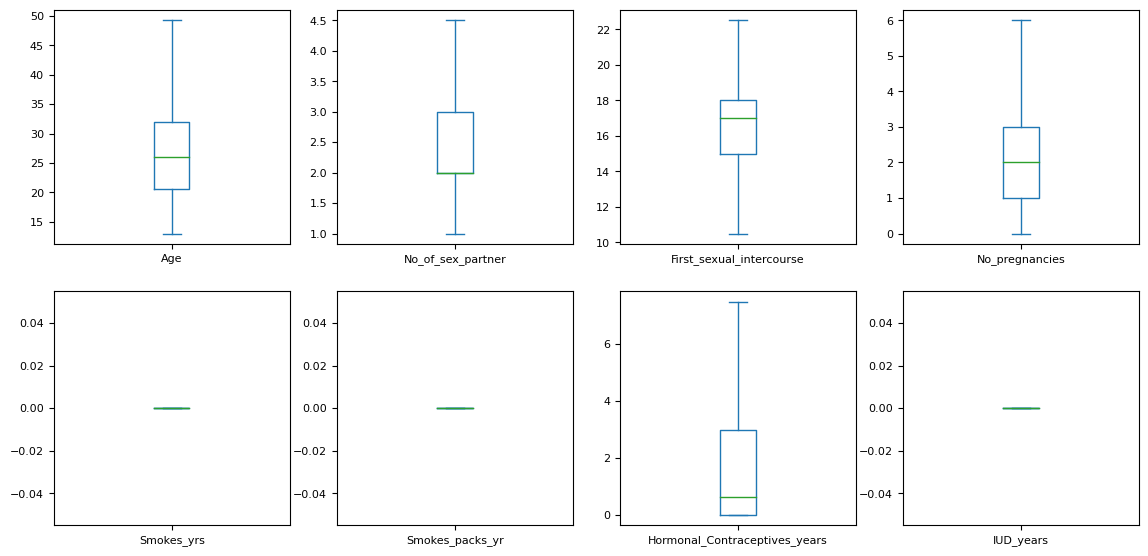

In [52]:
df_copy[numerical].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

* Now the outliers has been removed/capped 

In [53]:
df = df.astype('float64')

x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model 

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.3, random_state = 1)

l= []  #List to store the various model metrics 

In [54]:
def models_dt(x,y):
    mod = {}
    model = DecisionTreeClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Decision Tree'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_dt(x_train,y_train))

def models_rf(x,y):
    mod = {}
    model = RandomForestClassifier().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'Random Forest'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_rf(x_train,y_train))

def models_nb(x,y):
    mod = {}
    model = GaussianNB().fit(x,y)
    ypred = model.predict(x_test)
    mod['Model'] = 'GaussianNB'
    mod['Train_Score'] = model.score(x_train,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_nb(x_train,y_train))

def models_knn(x,y):
    mod = {}
    model = KNeighborsClassifier().fit(x,y)
    ypred = model.predict(x_test1)
    mod['Model'] = 'KNN'
    mod['Train_Score'] = model.score(x_train1,y_train)
    mod['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
    mod['f1score'] = metrics.f1_score(y_test,ypred)
    mod['recall'] = metrics.recall_score(y_test, ypred)
    mod['precision'] = metrics.precision_score(y_test, ypred)
    model.predict_proba(x_test)
    mod['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
    return mod
l.append(models_knn(x_train1,y_train))

In [55]:
base_df = pd.DataFrame(l)
base_df

,Model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Decision Tree,1.000000,0.946939,0.628571,0.785714,0.523810,0.871212
1,Random Forest,1.000000,0.942857,0.533333,0.571429,0.500000,0.768398
2,GaussianNB,0.131579,0.106122,0.113360,1.000000,0.060086,0.525974
3,KNN,0.956140,0.918367,0.166667,0.142857,0.200000,0.554113
